In [1]:
from itertools import repeat, chain

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("fivethirtyeight")
# 이미지가 레이아웃 안으로 들어오도록 함
mpl.rcParams.update({"figure.constrained_layout.use": True})
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
PRJCT_PATH = '/content/drive/MyDrive/kdt-EST-AI/project/project2/'
import sys
sys.path.append(PRJCT_PATH)
RSLT_DIR = os.path.join(PRJCT_PATH,'processed','etc')

In [4]:
from module_aladin.file_io import load_pkl, save_pkl

In [5]:
import numpy as np

np.random.random_sample(6)

array([0.67014492, 0.53902074, 0.13136134, 0.44144976, 0.51655423,
       0.77593309])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse
import pandas as pd

X =np.array([
  2.84e-4,
  3.92e-4,
  4.46e-4,
  5.00e-4,
  5.27e-4,
  5.54e-4,])
X = X.reshape(-1,1)

min_val, max_val = 149,550

deg_list = np.arange(-3,3.01,0.01)
deg_list = deg_list[np.abs(deg_list)>0.008]

deg_list

array([-3.  , -2.99, -2.98, -2.97, -2.96, -2.95, -2.94, -2.93, -2.92,
       -2.91, -2.9 , -2.89, -2.88, -2.87, -2.86, -2.85, -2.84, -2.83,
       -2.82, -2.81, -2.8 , -2.79, -2.78, -2.77, -2.76, -2.75, -2.74,
       -2.73, -2.72, -2.71, -2.7 , -2.69, -2.68, -2.67, -2.66, -2.65,
       -2.64, -2.63, -2.62, -2.61, -2.6 , -2.59, -2.58, -2.57, -2.56,
       -2.55, -2.54, -2.53, -2.52, -2.51, -2.5 , -2.49, -2.48, -2.47,
       -2.46, -2.45, -2.44, -2.43, -2.42, -2.41, -2.4 , -2.39, -2.38,
       -2.37, -2.36, -2.35, -2.34, -2.33, -2.32, -2.31, -2.3 , -2.29,
       -2.28, -2.27, -2.26, -2.25, -2.24, -2.23, -2.22, -2.21, -2.2 ,
       -2.19, -2.18, -2.17, -2.16, -2.15, -2.14, -2.13, -2.12, -2.11,
       -2.1 , -2.09, -2.08, -2.07, -2.06, -2.05, -2.04, -2.03, -2.02,
       -2.01, -2.  , -1.99, -1.98, -1.97, -1.96, -1.95, -1.94, -1.93,
       -1.92, -1.91, -1.9 , -1.89, -1.88, -1.87, -1.86, -1.85, -1.84,
       -1.83, -1.82, -1.81, -1.8 , -1.79, -1.78, -1.77, -1.76, -1.75,
       -1.74, -1.73,

In [ ]:
cands = sorted((max_val-min_val) * np.random.random_sample(len(X))+min_val)
cands = np.round(cands)

cands, len(set(cands))

(array([151., 227., 321., 323., 520., 532.]), 6)

In [ ]:
max_val, min_val

(550, 149)

In [ ]:
from tqdm.auto import tqdm
from collections import defaultdict

cands_list = []

for i in tqdm(range(1000)):
  while True :
    cands = sorted(np.random.choice(np.arange(min_val,max_val+1), len(X), replace=False))
#    cands = sorted((max_val-min_val) * np.random.random_sample(len(X))+min_val)
    cands = np.round(cands)
    if len(set(cands))==len(X) : break
  cands_list.append(cands[::-1])

rslts = defaultdict(list)
whole_rslts = dict()

X = X.reshape(-1,1)
for cands in tqdm(cands_list):
  reg_rslt=dict()
  for deg in deg_list:
    y= np.power(cands, deg)
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X,y)
    a,b = reg.coef_,reg.intercept_
    estim = np.nan_to_num(np.power(a*X+b,1/deg))
    reg_rslt[deg]= {
        'a,b':[a,b],
        'r2score1':r2_score(cands,estim),
        'rmse' : rmse(cands,estim),
        'r2score2':r2_score(y,a*X+b),
    }
  df_rslt = pd.DataFrame(reg_rslt).T
  #display(df_rslt.T[['r2score1','r2score2']].describe())
  rslts['r2score1'].append(df_rslt.r2score1.max())
  rslts['rmse1'].append(df_rslt.rmse.min())
  idx = df_rslt.index[df_rslt.r2score2.argmax()]
  rslts['r2score20'].append(df_rslt.loc[idx,'r2score2'])
  rslts['r2score21'].append(df_rslt.loc[idx,'r2score1'])
  rslts['rmse2'].append(df_rslt.loc[idx,'rmse'])
  rslts['r2score3'].append(df_rslt[['r2score1','r2score2']].min(axis=1)) #이때 RMSE
  whole_rslts[tuple(cands)]=reg_rslt
  #RMSE가 최소일때 r2score2개


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-131-fa2b78cbd5af>:25: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-131-fa2b78cbd5af>:25: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-131-fa2b78cbd5af>:25: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-131-fa2b78cbd5af>:25: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-131-fa2b78cbd5af>:25: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-131-fa2b78cbd5af>:25: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-131-fa2b78cbd5af>:25: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-131-

In [ ]:
if not os.path.exists(RSLT_DIR) : os.makedirs(RSLT_DIR)
save_pkl(RSLT_DIR,'reg_simulation_1.pkl',whole_rslts)

In [7]:
whole_rslts = load_pkl(os.path.join(RSLT_DIR,'reg_simulation_1.pkl'))

In [8]:
from collections import defaultdict

rslts = defaultdict(list)

for cand, reg_rslt in whole_rslts.items():
  df_rslt = pd.DataFrame(reg_rslt).T
  #display(df_rslt.T[['r2score1','r2score2']].describe())
  idx = df_rslt.index[df_rslt.r2score1.argmax()]
  rslts['r2score11'].append(df_rslt.loc[idx,'r2score1'])
  rslts['r2score12'].append(df_rslt.loc[idx,'r2score2'])
  rslts['rmse1'].append(df_rslt.loc[idx,'rmse'])
  idx = df_rslt.index[df_rslt.r2score2.argmax()]
  rslts['r2score22'].append(df_rslt.loc[idx,'r2score2'])
  rslts['r2score21'].append(df_rslt.loc[idx,'r2score1'])
  rslts['rmse2'].append(df_rslt.loc[idx,'rmse'])
  idx = df_rslt.index[df_rslt[['r2score1','r2score2']].min(axis=1).argmax()]
  rslts['r2score3'].append(df_rslt.loc[idx,['r2score1','r2score2']].min())
  rslts['rmse3'].append(df_rslt.loc[idx,'rmse'])
  idx = df_rslt.index[df_rslt.rmse.argmin()]
  rslts['r2score42'].append(df_rslt.loc[idx,'r2score2'])
  rslts['r2score41'].append(df_rslt.loc[idx,'r2score1'])
  rslts['rmse4'].append(df_rslt.loc[idx,'rmse'])



In [9]:
!pip install latex
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for latex: filename=latex-0.7.0-py3-none-any.whl size=7588 sha256=12e0187ced6a83b27116aaab9ce2cc177b69067cd5196f048df99f09f9b08735
  Stored in directory: /root/.cache/pip/wheels/e5/b3/95/f4b45b5116d4585893cdcb2ac7c07614a59fb047c754c4651a
  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7227 sha256=3c73193c2c123b10bd09d4d331699b647c18eac37b9f6457cf8a7f4084ef6324
  Stored in directory: /root/.cache/pip/wheels/d2/d3/10/d5fe9bc9dcb197ea289baccca92a25f2f95135235a92ca1b11
  Created wheel for shutilwhich: filename=shutilwhich-1.1.0-py3-none-any.whl size=2766 sha256=ee81e8a0b353da89a8ae6c4a934413fd4ad62c19c8fe66f7dd555f89aa75db9e
  Stored in directory: /root/.cache/pip/wheels/6a/49/7a/3997889a5643ddb4a1d21692c6916fd2fc482965211d9a3ca5
  Created wheel for tempdir: filename=tempdir-0.7.1-py3-none-any.w

In [10]:
rslts.keys()

dict_keys(['r2score11', 'r2score12', 'rmse1', 'r2score22', 'r2score21', 'rmse2', 'r2score3', 'rmse3', 'r2score42', 'r2score41', 'rmse4'])

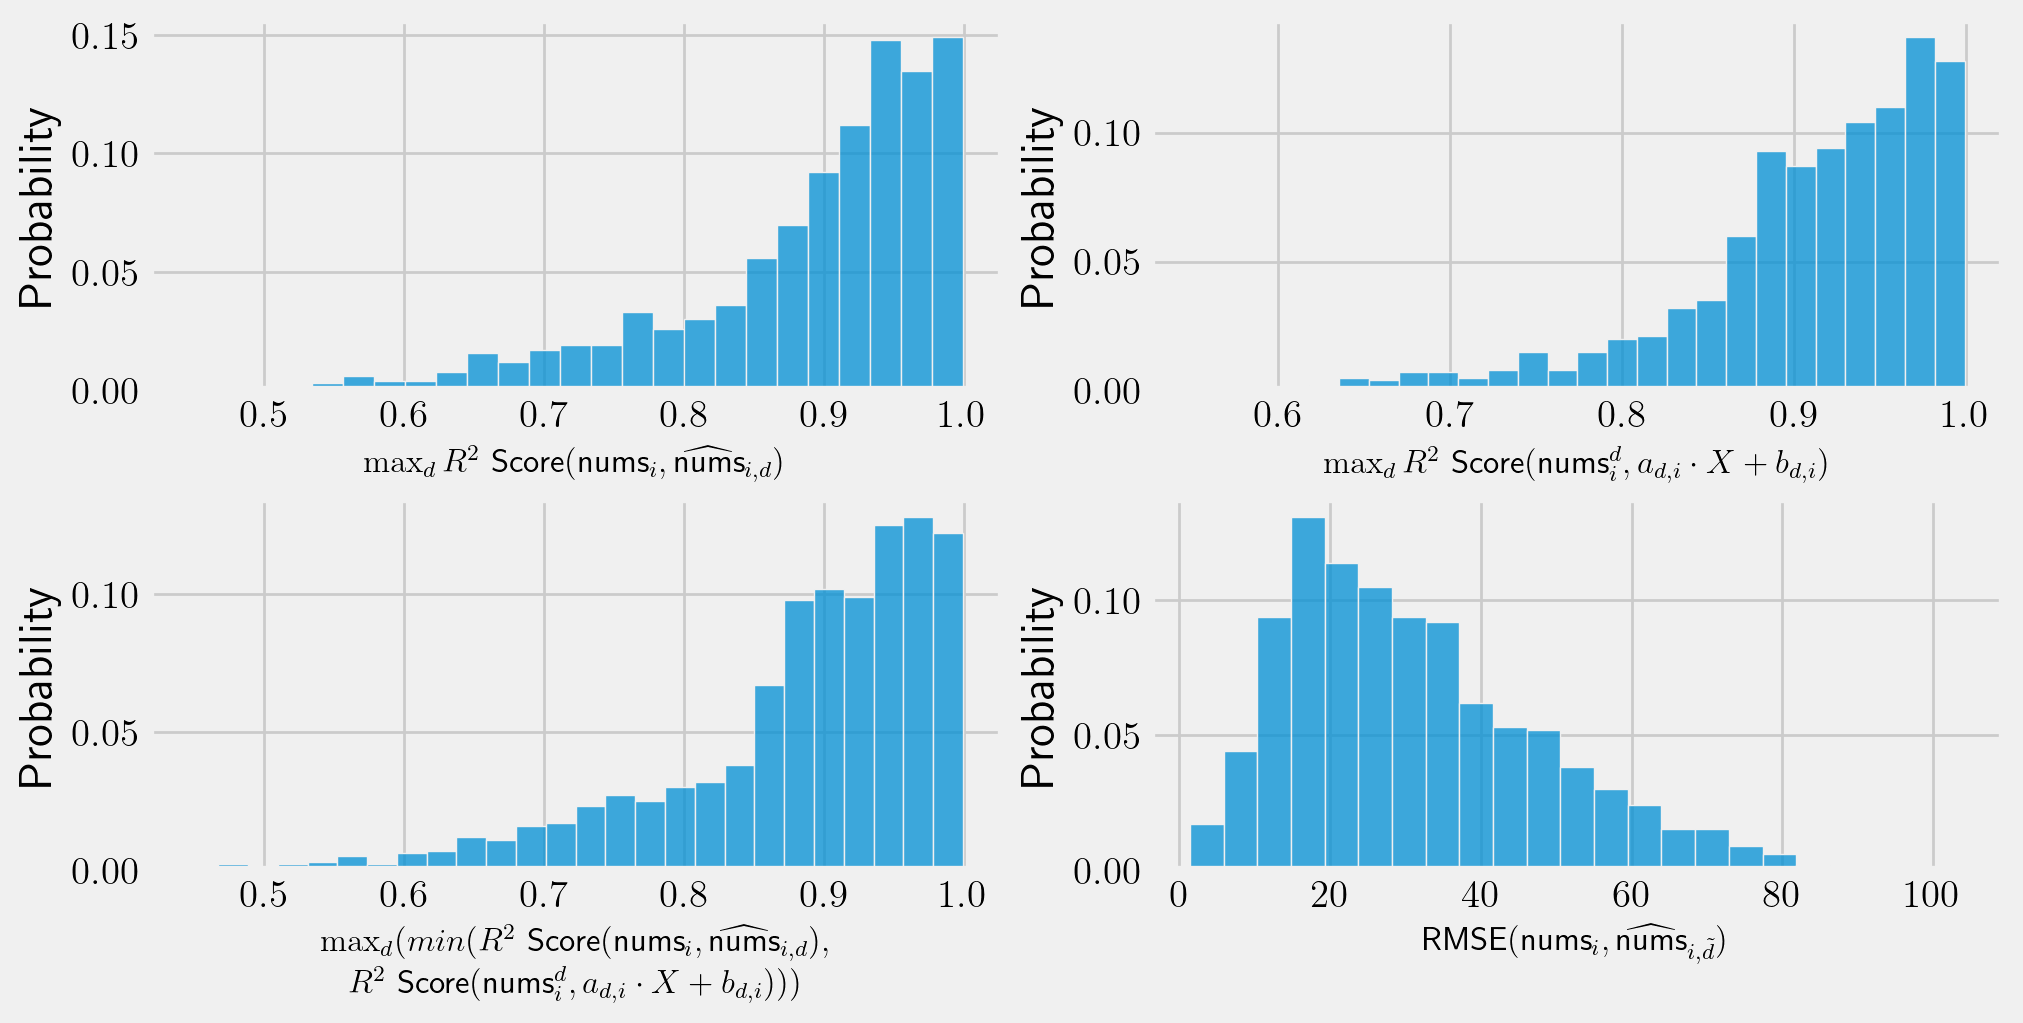

In [29]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
#from matplotlib import rcParams
#rcParams['text.usetex'] = True

fig,ax = plt.subplots(2,2, figsize=(10,5))

#sns.histplot(deg_list,ax=ax[0])
#sns.histplot(deg_list,ax=ax[1])
#sns.histplot(deg_list,ax=ax[2])
sns.histplot(rslts['r2score11'],ax=ax[0][0],stat='probability')
sns.histplot(rslts['r2score22'],ax=ax[0][1],stat='probability')
#sns.histplot(rslts['rmse1'],ax=ax[1][0],stat='probability')
sns.histplot(rslts['r2score3'],ax=ax[1][0],stat='probability')
sns.histplot(rslts['rmse3'],ax=ax[1][1],stat='probability')
#sns.histplot(rslts['r2score3'],ax=ax[1][1],stat='probability',binwidth=0.005,cumulative=True)
#ax[1][1].set_xlim(0.95,1)
#ax[1][1].set_ylim(0.7,1)
#sns.histplot(rslts['rmse3'],ax=ax[1][2],stat='probability',binwidth=1,cumulative=True)
#ax[1][2].set_xlim(0,15)
#ax[1][2].set_ylim(0,0.25)

ax[0][0].set_xlabel(r'$\max_{d}R^2$ Score$(\text{nums}_i,\widehat{\text{nums}}_{i,d})$',fontsize = 12)
ax[0][1].set_xlabel(r'$\max_{d}R^2$ Score$(\text{nums}_i^d,a_{d,i}\cdot X+b_{d,i})$',fontsize = 12)
#ax[1][0].set_xlabel(r'$\min_{d}$RMSE$(\text{nums}_i,\widehat{\text{nums}}_{i,d})$',fontsize = 12)
ax[1][0].set_xlabel(r'$\max_{d}(min(R^2$ Score$(\text{nums}_i,\widehat{\text{nums}}_{i,d}),$'+'  \n'+r'$R^2$ Score$(\text{nums}_i^d,a_{d,i}\cdot X+b_{d,i})))$',fontsize = 12)
ax[1][1].set_xlabel(r'RMSE$(\text{nums}_i,\widehat{\text{nums}}_{i,\tilde{d}})$',fontsize = 12)
#ax[1][1].set_xlabel(r'$\max_{d}(min(R^2$ Score$(\text{nums}_i,\widehat{\text{nums}}_{i,d}),R^2$ Score$(\text{nums}_i^d,a_{d,i}\cdot X+b_{d,i})))$',fontsize = 12)
pass

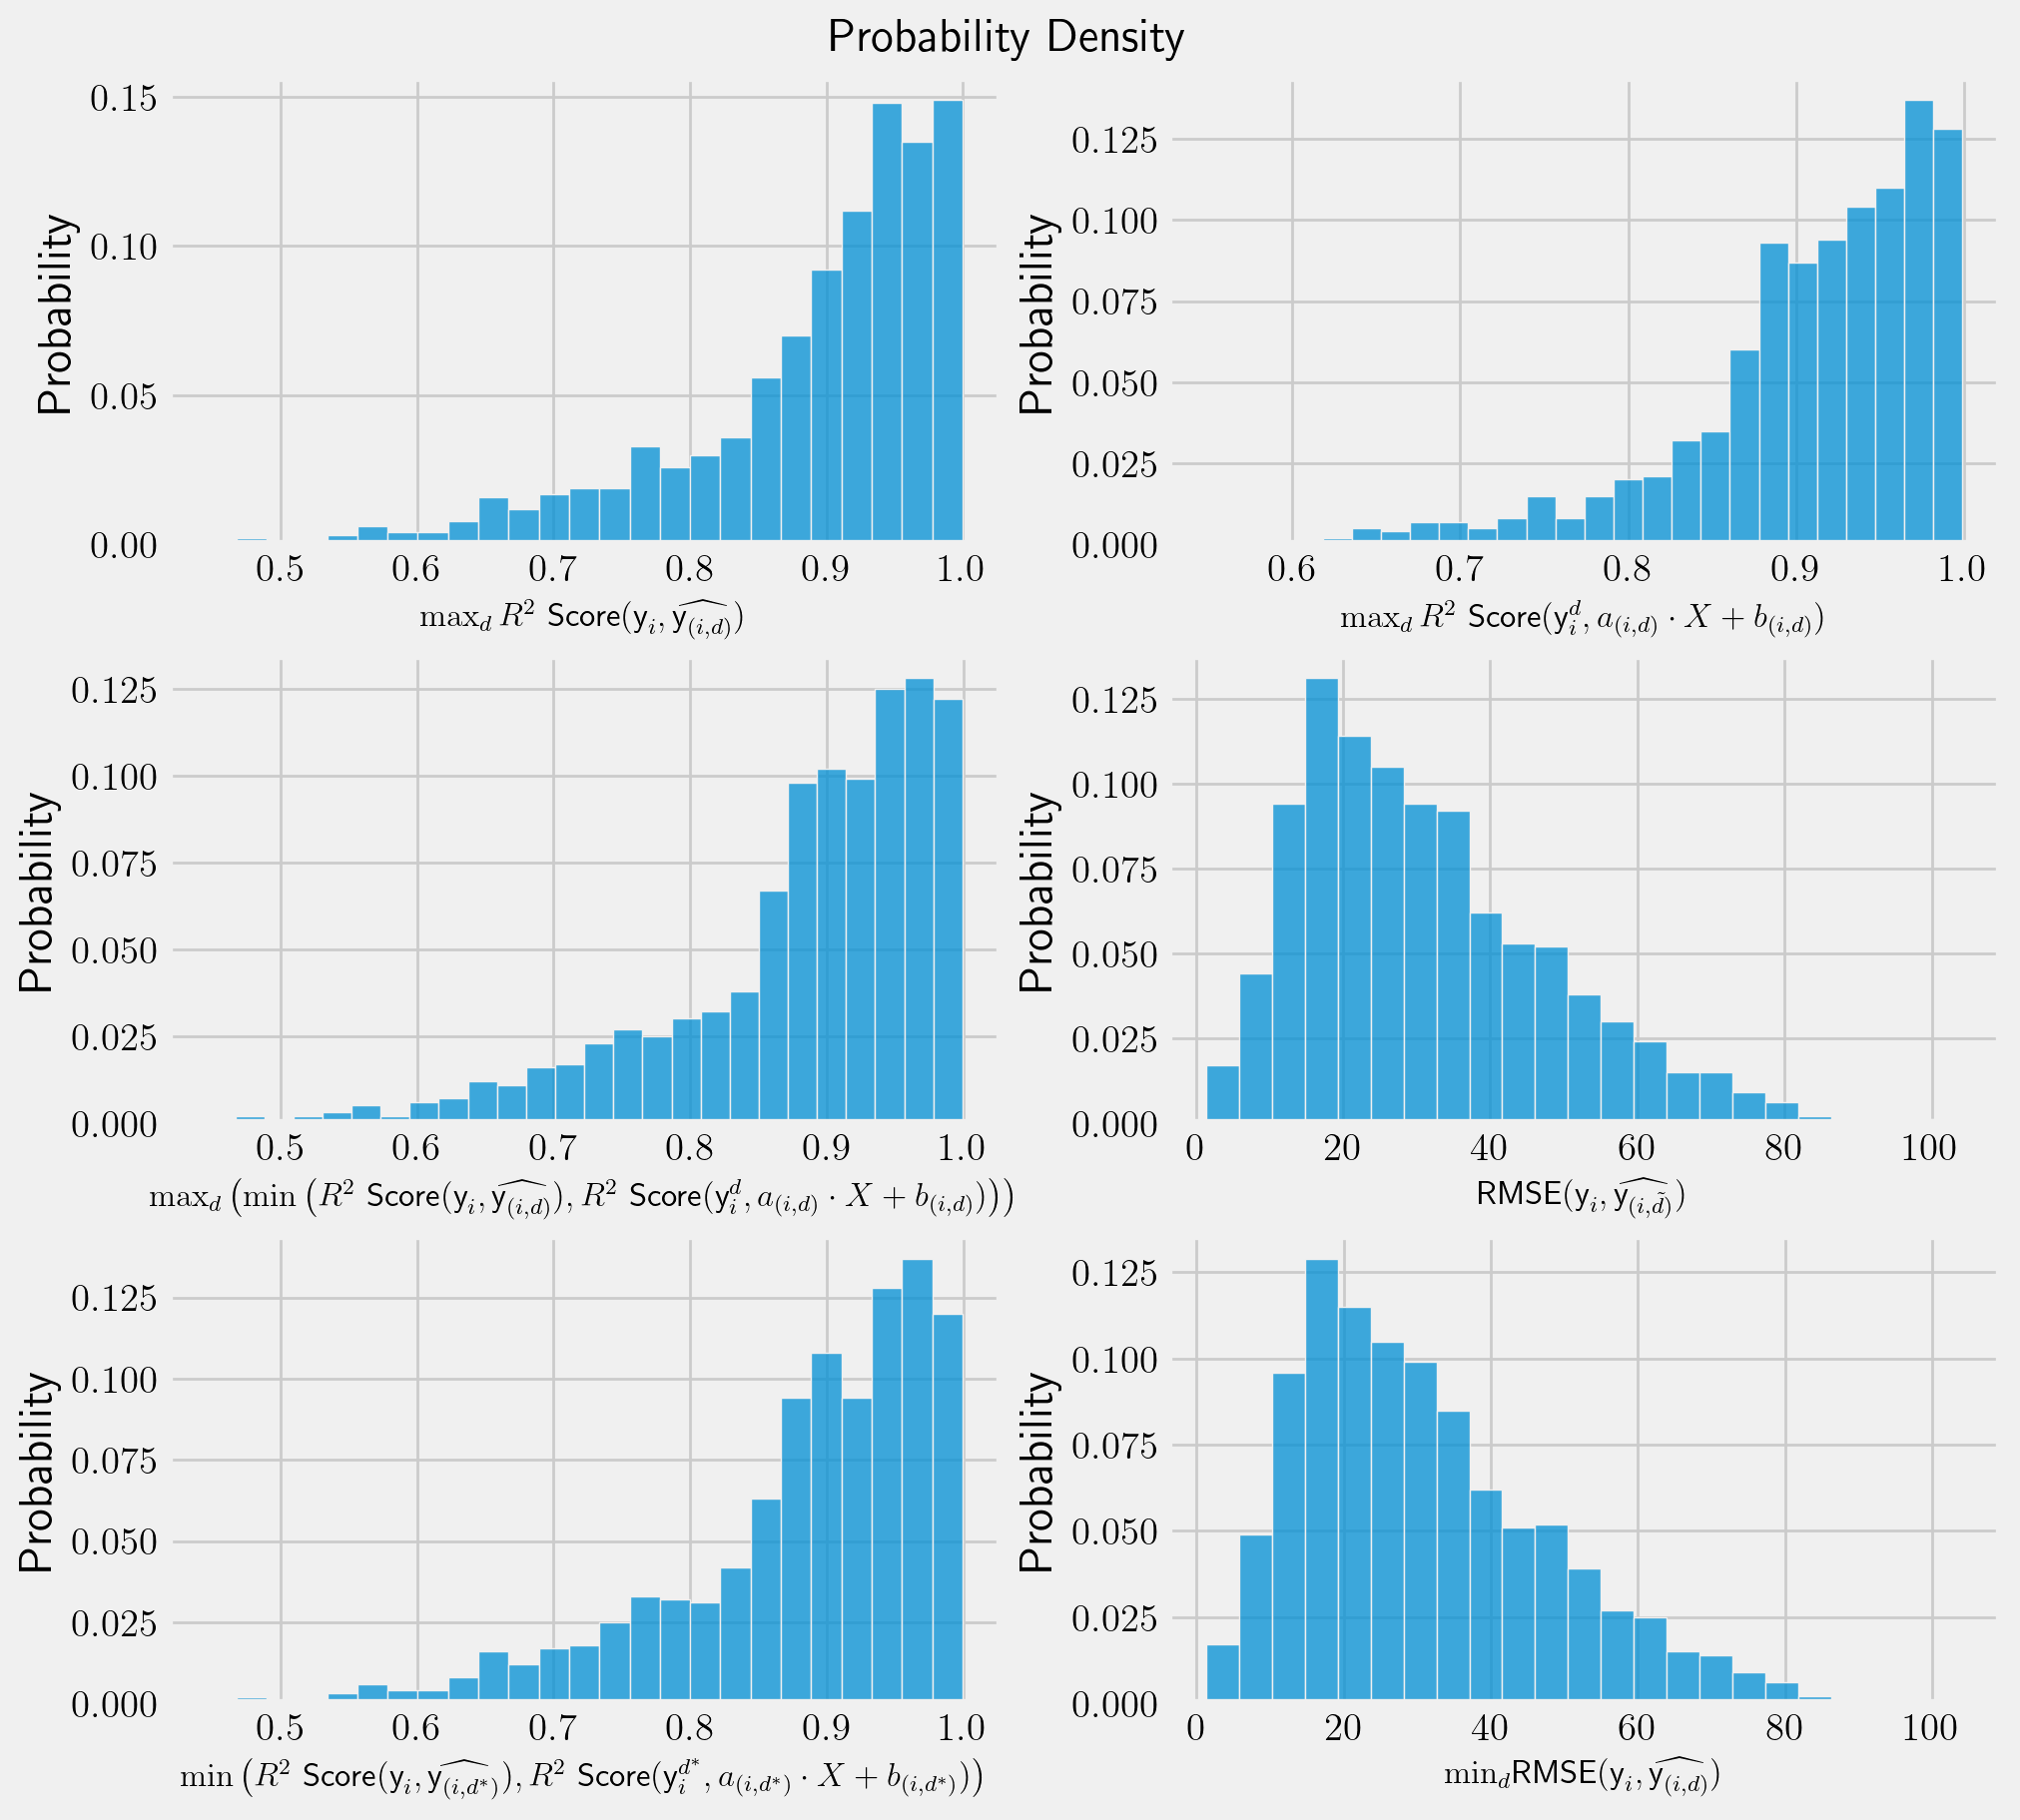

In [57]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
#from matplotlib import rcParams
#rcParams['text.usetex'] = True

fig,ax = plt.subplots(3,2, figsize=(10,9))

fig.suptitle("Probability Density")

df_temp = pd.DataFrame(rslts)

sns.histplot(rslts['r2score11'],ax=ax[0][0],stat='probability')
sns.histplot(rslts['r2score22'],ax=ax[0][1],stat='probability')
sns.histplot(rslts['rmse3'],ax=ax[1][1],stat='probability')
sns.histplot(rslts['r2score3'],ax=ax[1][0],stat='probability')
sns.histplot(rslts['rmse4'],ax=ax[2][1],stat='probability')
sns.histplot(df_temp[['r2score41','r2score42']].min(axis=1),ax=ax[2][0],stat='probability')
#ax[1][1].set_xlim(0.95,1)
#ax[1][1].set_ylim(0.7,1)
#sns.histplot(rslts['rmse3'],ax=ax[1][2],stat='probability',binwidth=1,cumulative=True)
#ax[1][2].set_xlim(0,15)
#ax[1][2].set_ylim(0,0.25)

ax[0][0].set_xlabel(r'$\max_{d}R^2$ Score$(\text{y}_i,\widehat{\text{y}_{(i,d)}})$',fontsize = 12)
ax[0][1].set_xlabel(r'$\max_{d}R^2$ Score$(\text{y}_i^d,a_{(i,d)}\cdot X+b_{(i,d)})$',fontsize = 12)
#ax[1][0].set_xlabel(r'$\max_{d}(min(R^2$ Score$(\text{y}_i,\widehat{\text{y}}_{(i,d)}),$'+'  \n'+r'$R^2$ Score$(\text{y}_i^d,a_{(i,d)}\cdot X+b_{(i,d)})))$',fontsize = 12)
ax[1][0].set_xlabel(r'$\max_{d}\left(\min\left(R^2\text{ Score}(\text{y}_i,\widehat{\text{y}_{(i,d)}}),R^2\text{ Score}(\text{y}_i^{d},a_{(i,d)}\cdot X+b_{(i,d)})\right)\right)$',fontsize = 12)
ax[1][1].set_xlabel(r'RMSE$(\text{y}_i,\widehat{\text{y}_{(i,\tilde{d})}})$',fontsize = 12)
ax[2][0].set_xlabel(r'$\min\left(R^2\text{ Score}(\text{y}_i,\widehat{\text{y}_{(i,d^*)}}),R^2\text{ Score}(\text{y}_i^{d^*},a_{(i,d^*)}\cdot X+b_{(i,d^*)})\right)$',fontsize = 12)
ax[2][1].set_xlabel(r'$\min_d$RMSE$(\text{y}_i,\widehat{\text{y}_{(i,d)}})$',fontsize = 12)
pass

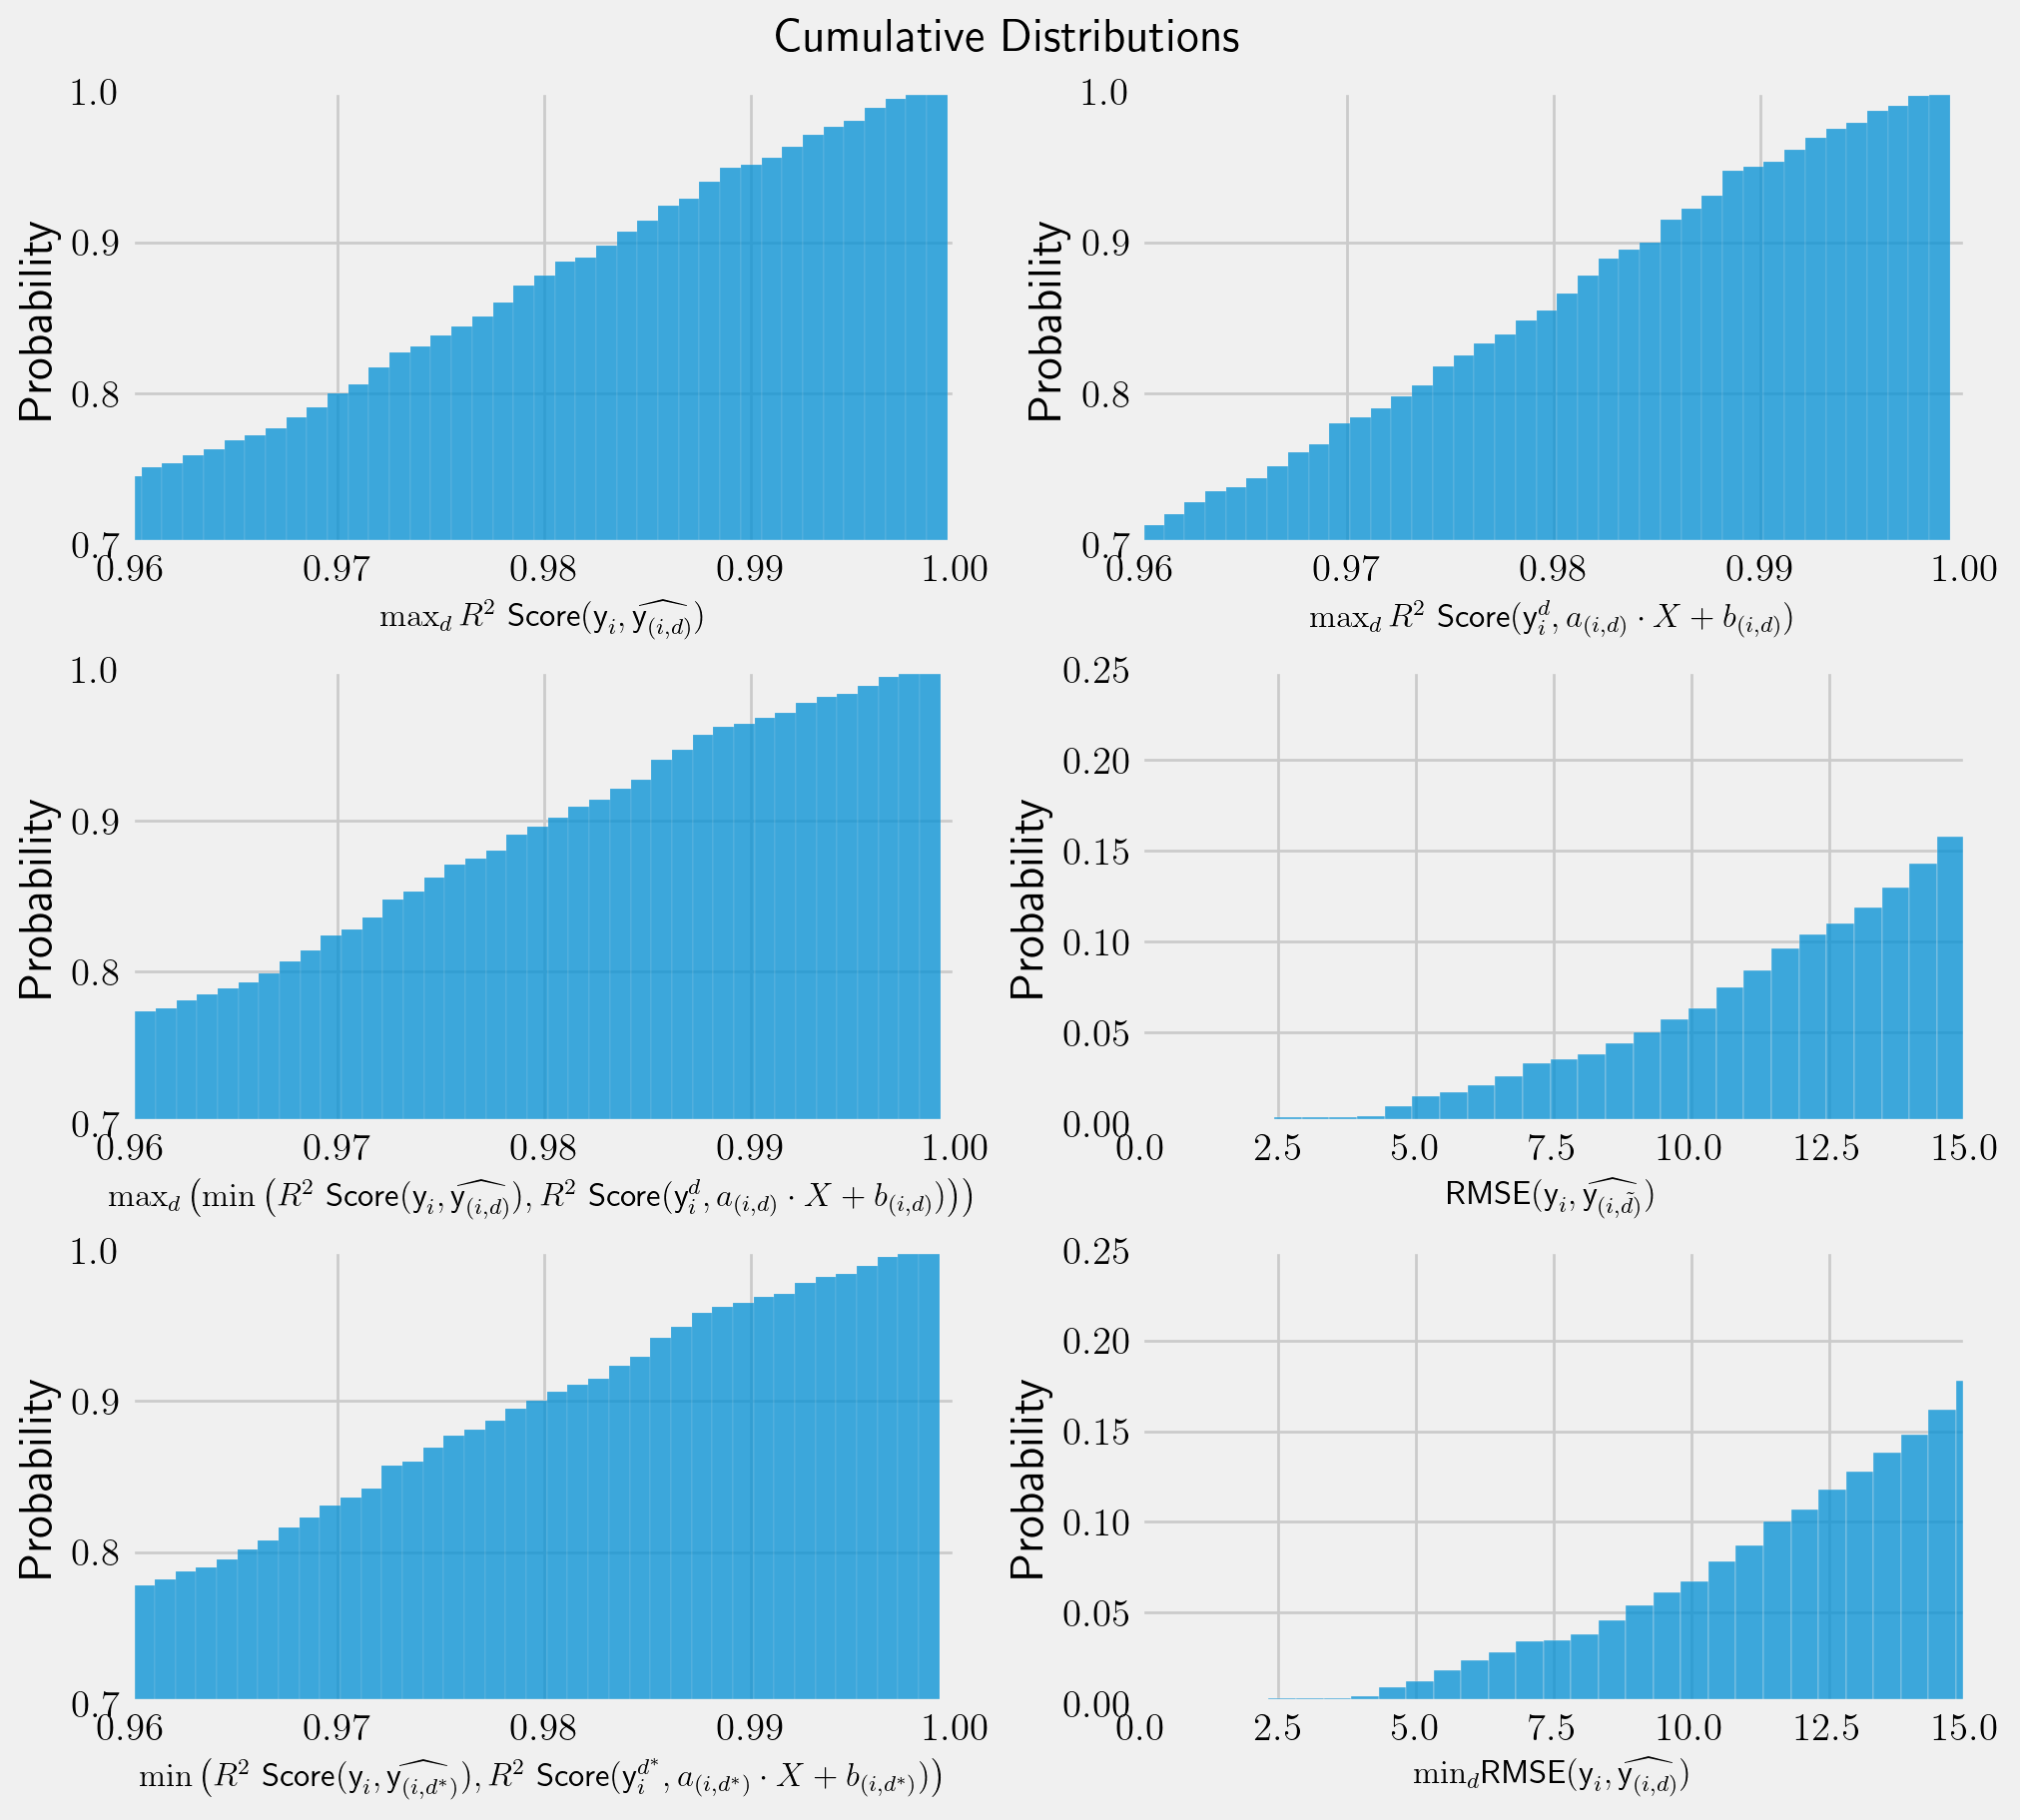

In [58]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
#from matplotlib import rcParams
#rcParams['text.usetex'] = True

fig,ax = plt.subplots(3,2, figsize=(10,9))

df_temp = pd.DataFrame(rslts)

sns.histplot(rslts['r2score11'],ax=ax[0][0],stat='probability',cumulative=True,binwidth=0.001)
sns.histplot(rslts['r2score22'],ax=ax[0][1],stat='probability',cumulative=True,binwidth=0.001)
sns.histplot(rslts['rmse3'],ax=ax[1][1],stat='probability',cumulative=True,binwidth=0.5)
sns.histplot(rslts['r2score3'],ax=ax[1][0],stat='probability',cumulative=True,binwidth=0.001)
sns.histplot(rslts['rmse4'],ax=ax[2][1],stat='probability',cumulative=True,binwidth=0.5)
sns.histplot(df_temp[['r2score41','r2score42']].min(axis=1),ax=ax[2][0],stat='probability',cumulative=True,binwidth=0.001)

data_type = [
    ['r2','r2'],
    ['r2','rmse'],
    ['r2','rmse'],

]
fig.suptitle("Cumulative Distributions")

for i,types in enumerate(data_type):
  for j,txt in enumerate(types):
    if txt == 'r2':
      ax[i][j].set_xlim(0.96,1)
      ax[i][j].set_ylim(0.7,1)
    else :
      ax[i][j].set_xlim(0,15)
      ax[i][j].set_ylim(0,0.25)

ax[0][0].set_xlabel(r'$\max_{d}R^2$ Score$(\text{y}_i,\widehat{\text{y}_{(i,d)}})$',fontsize = 12)
ax[0][1].set_xlabel(r'$\max_{d}R^2$ Score$(\text{y}_i^d,a_{(i,d)}\cdot X+b_{(i,d)})$',fontsize = 12)
#ax[1][0].set_xlabel(r'$\max_{d}(min(R^2$ Score$(\text{y}_i,\widehat{\text{y}}_{(i,d)}),$'+'  \n'+r'$R^2$ Score$(\text{y}_i^d,a_{(i,d)}\cdot X+b_{(i,d)})))$',fontsize = 12)
ax[1][0].set_xlabel(r'$\max_{d}\left(\min\left(R^2\text{ Score}(\text{y}_i,\widehat{\text{y}_{(i,d)}}),R^2\text{ Score}(\text{y}_i^{d},a_{(i,d)}\cdot X+b_{(i,d)})\right)\right)$',fontsize = 12)
ax[1][1].set_xlabel(r'RMSE$(\text{y}_i,\widehat{\text{y}_{(i,\tilde{d})}})$',fontsize = 12)
ax[2][0].set_xlabel(r'$\min\left(R^2\text{ Score}(\text{y}_i,\widehat{\text{y}_{(i,d^*)}}),R^2\text{ Score}(\text{y}_i^{d^*},a_{(i,d^*)}\cdot X+b_{(i,d^*)})\right)$',fontsize = 12)
ax[2][1].set_xlabel(r'$\min_d$RMSE$(\text{y}_i,\widehat{\text{y}_{(i,d)}})$',fontsize = 12)
pass

In [17]:
from scipy.special import comb

i = comb((550-149+1),6)
'{:.3e}'.format(i)

'5.646e+12'

In [13]:
np.mean(np.array(rslts['r2score3'])>0.96)

0.233

In [46]:
print(np.mean(np.array(rslts['rmse4'])<10))
print(np.mean(np.array(rslts['rmse3'])<10))
print(np.mean(np.array(rslts['rmse2'])<10))
print(np.mean(np.array(rslts['rmse1'])<10))
print(np.mean((np.array(rslts['r2score11'])>0.975) & (np.array(rslts['rmse1'])<10)))
print(np.mean((np.array(rslts['r2score3'])>0.96) & (np.array(rslts['rmse4'])<10)))
print(np.mean((np.array(rslts['r2score3'])>0.98) & (np.array(rslts['rmse3'])<10)))
print(np.mean((np.array(rslts['r2score3'])>0.975) & (np.array(rslts['rmse3'])<10)))
print(np.mean((np.array(rslts['r2score3'])>0.96) & (np.array(rslts['rmse3'])<10)))

0.062
0.057
0.053
0.062
0.058
0.058
0.049
0.053
0.054


In [18]:
df_temp = pd.DataFrame(rslts)
df_temp

,r2score11,r2score12,rmse1,r2score22,r2score21,rmse2,r2score3,rmse3,r2score42,r2score41,rmse4
0,0.887162,0.863432,48.319910,0.882616,0.801863,64.029763,0.874785,50.901042,0.863432,0.887162,48.319910
1,0.937448,0.914900,26.958169,0.918726,0.928284,28.865394,0.918726,28.865394,0.914900,0.937448,26.958169
2,0.996983,0.988333,6.362851,0.988493,0.996681,6.674246,0.988493,6.674246,0.988333,0.996983,6.362851
3,0.921699,0.926979,40.497630,0.953684,0.664800,83.791212,0.921699,40.497630,0.926979,0.921699,40.497630
4,0.874686,0.874748,45.129944,0.892474,-0.414503,151.623381,0.874686,45.129944,0.874748,0.874686,45.129944
...,...,...,...,...,...,...,...,...,...,...,...
995,0.959518,0.959916,23.511446,0.960129,0.959112,23.629197,0.959518,23.511446,0.959916,0.959518,23.511446
996,0.986203,0.985605,14.361774,0.986068,0.985612,14.666115,0.986001,14.466515,0.985605,0.986203,14.361774
997,0.784649,0.849344,51.688275,0.863688,0.784242,51.737022,0.784649,51.688275,0.849344,0.784649,51.688275
998,0.995239,0.995408,5.347459,0.995831,0.994603,5.693076,0.995239,5.347459,0.995408,0.995239,5.347459


In [19]:
df_temp.describe()

,r2score11,r2score12,rmse1,r2score22,r2score21,rmse2,r2score3,rmse3,r2score42,r2score41,rmse4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.888978,0.902694,30.984146,0.909314,0.871471,33.508855,0.883807,31.295749,0.902694,0.888978,30.984146
std,0.099462,0.084159,17.096909,0.075027,0.142700,20.402064,0.098434,17.059302,0.084159,0.099462,17.096909
min,0.445635,0.477518,1.333619,0.548735,-1.621015,1.429354,0.445635,1.429354,0.477518,0.445635,1.333619
25%,0.850364,0.872735,17.772672,0.878974,0.827062,18.551197,0.846291,18.118689,0.872735,0.850364,17.772672
50%,0.919937,0.922216,27.877677,0.925855,0.909853,29.076432,0.909644,28.053490,0.922216,0.919937,27.877677
75%,0.961434,0.964233,40.727702,0.967083,0.955344,44.405762,0.956674,41.167012,0.964233,0.961434,40.727702
max,0.999530,0.999140,104.102564,0.999189,0.999460,230.015066,0.999189,104.178812,0.999140,0.999530,104.102564


In [20]:
df_temp = pd.DataFrame(rslts)
np.mean(df_temp['rmse1'] < df_temp['rmse3'])

0.317

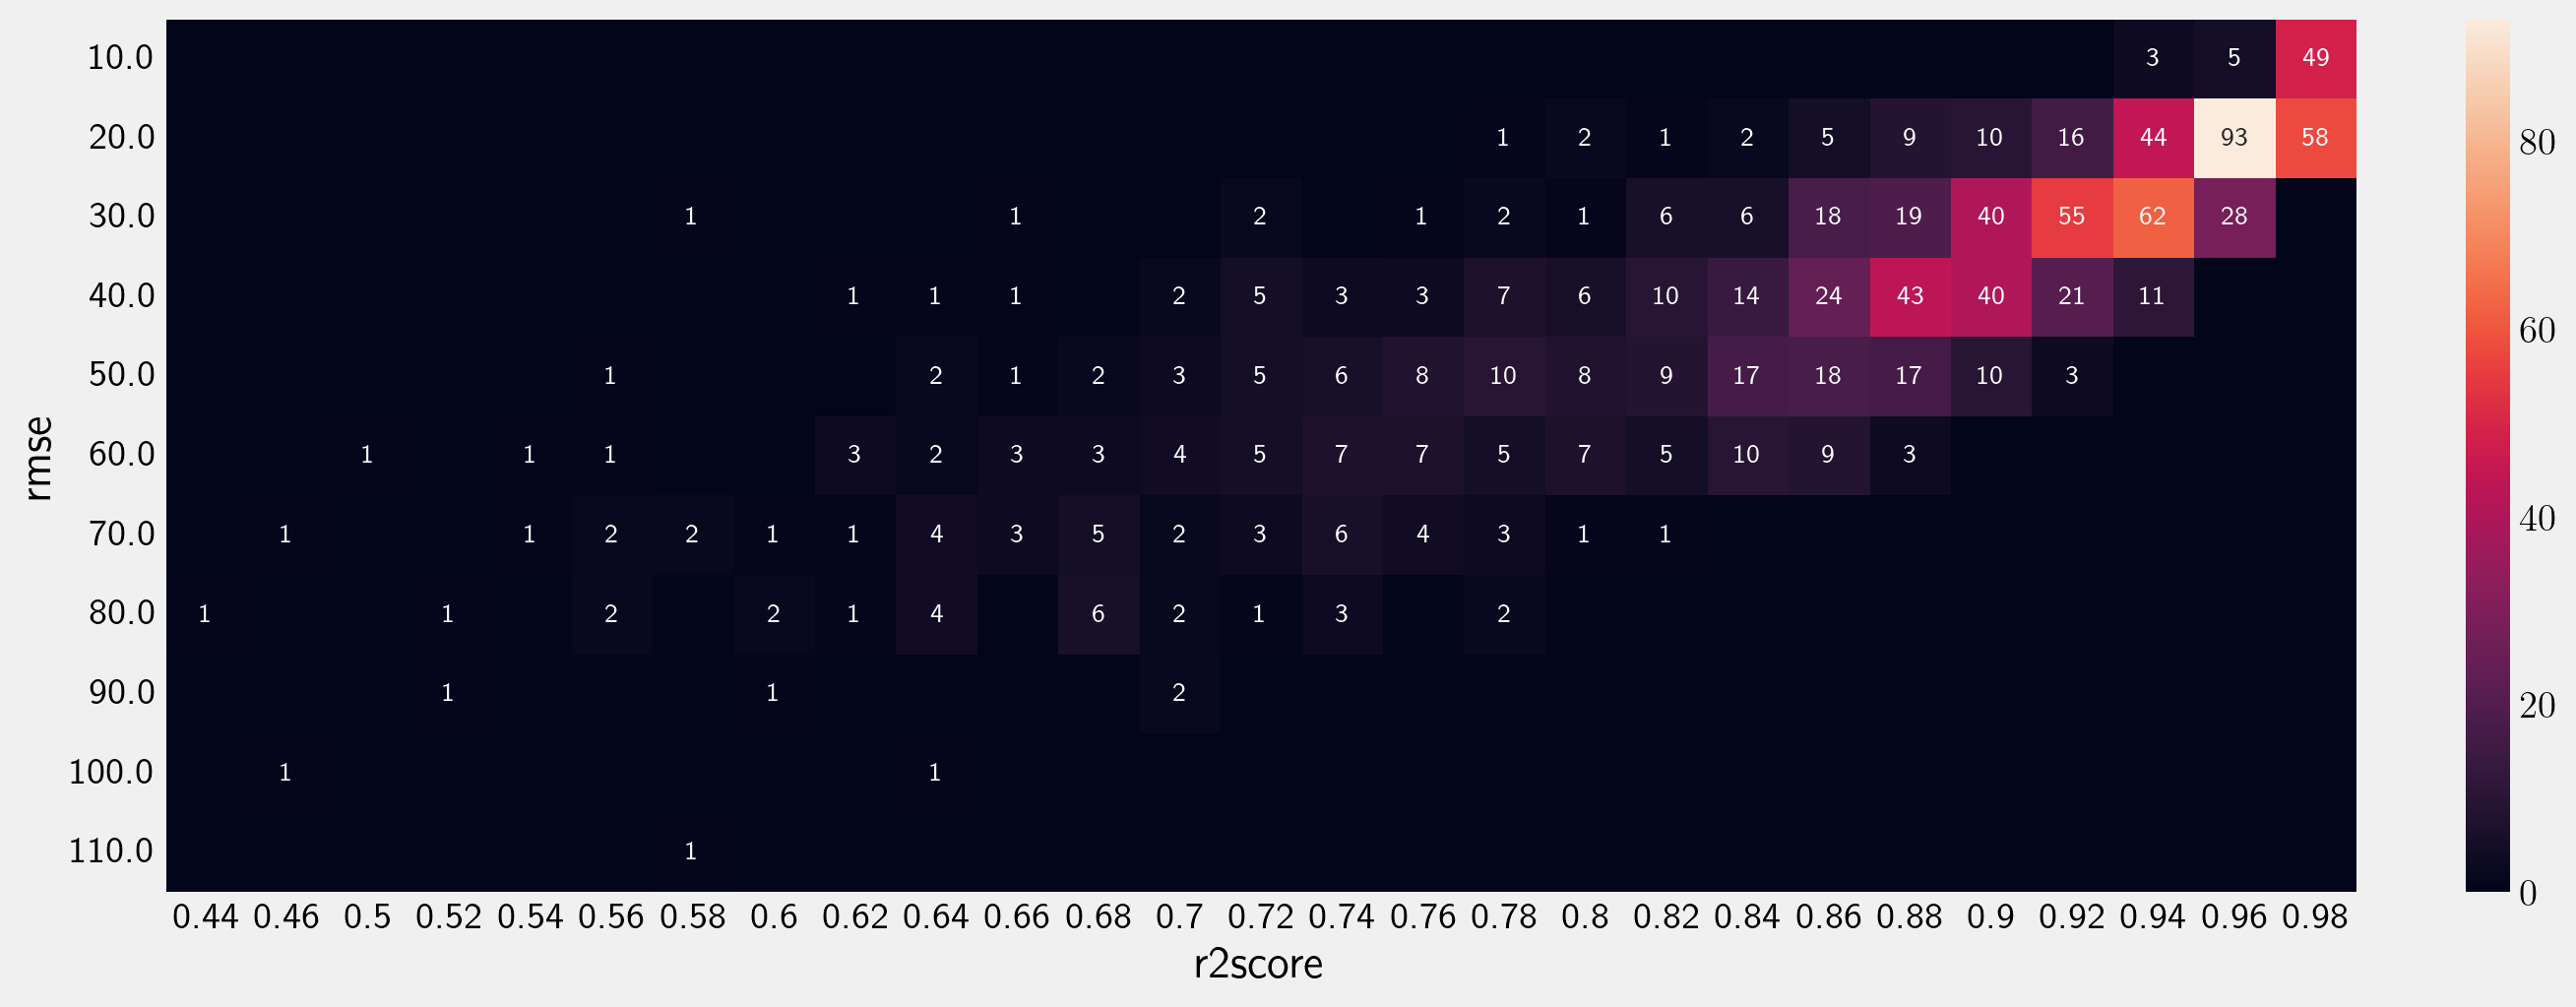

In [21]:
df_temp['r2score'] = (df_temp['r2score3']*100 //2)*2/100
df_temp['rmse'] = (df_temp['rmse3']//10)*10+10

data = pd.crosstab(df_temp['r2score'],df_temp['rmse']).T
fig,ax = plt.subplots(figsize=(13,5))
sns.heatmap(data,annot=True,ax=ax,annot_kws={'size':10},fmt='d')

show_annot_array = data > 0
for text, show_annot in zip(ax.texts, show_annot_array.values.flatten()):
    text.set_visible(show_annot)

ax.set_xlabel("")

Text(-1.3885555555555573, 0.5, 'RMSE$(\\text{y}_i,\\widehat{\\text{y}_{(i,\\tilde{d})}})$')

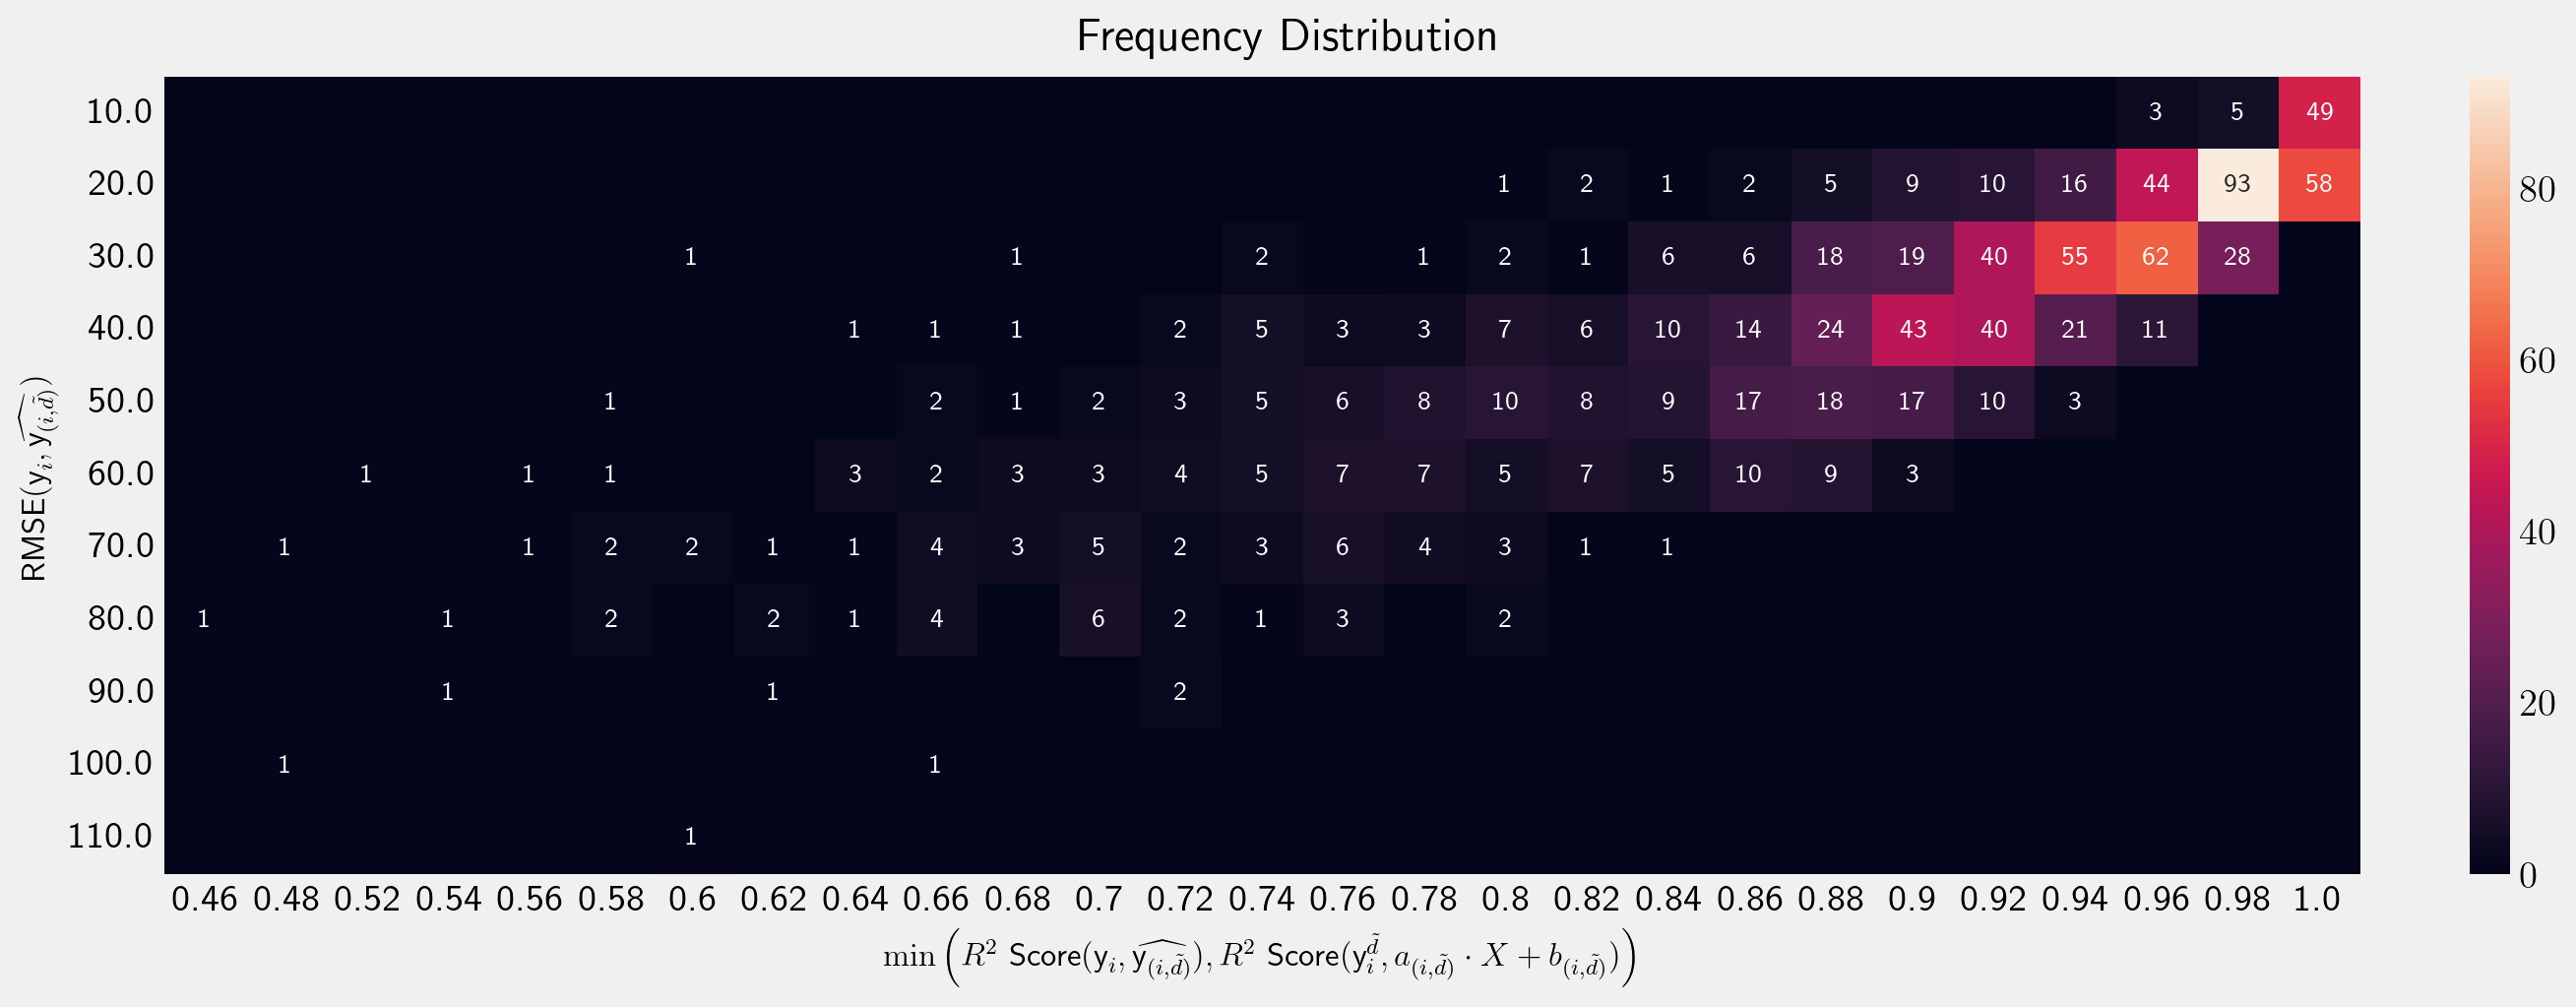

In [64]:

df_temp = pd.DataFrame(rslts)
#df_temp['r2score'] = (df_temp['r2score3']*100 //2)*2/100 #~ 이상
df_temp['r2score'] = np.ceil(df_temp['r2score3']*100/2)*2/100 #~ 이하
df_temp['rmse'] = (df_temp['rmse3']//10)*10+10 #~ 미만

data = pd.crosstab(df_temp['r2score'],df_temp['rmse']).T
fig,ax = plt.subplots(figsize=(13,5))
fig.suptitle('Frequency Distribution')
sns.heatmap(data,annot=True,ax=ax,annot_kws={'size':10},fmt='d')

show_annot_array = data > 0
for text, show_annot in zip(ax.texts, show_annot_array.values.flatten()):
    text.set_visible(show_annot)

ax.set_xlabel(r'$\min\left(R^2\text{ Score}(\text{y}_i,\widehat{\text{y}_{(i,\tilde{d})}}),R^2\text{ Score}(\text{y}_i^{\tilde{d}},a_{(i,\tilde{d})}\cdot X+b_{(i,\tilde{d})})\right)$',fontsize = 12)
ax.set_ylabel(r'RMSE$(\text{y}_i,\widehat{\text{y}_{(i,\tilde{d})}})$',fontsize = 12)
#ax.set_xlabel(r'$\min (R^2$ Score$(\text{nums}_i^{\tilde{d}},a_{\tilde{d},i}\cdot X+b_{\tilde{d},i}),R^2$ Score$(\text{nums}_i,\widehat{\text{nums}}_{\tilde{d},i}))$',fontsize = 12)
#ax.set_ylabel(r'RMSE($\text{nums}_i,\widehat{\text{nums}}_{\tilde{d},i}$)',fontsize=12)

Text(-1.3885555555555573, 0.5, 'RMSE($\\text{nums}_i,\\widehat{\\text{nums}}_{\\tilde{d},i}$)')

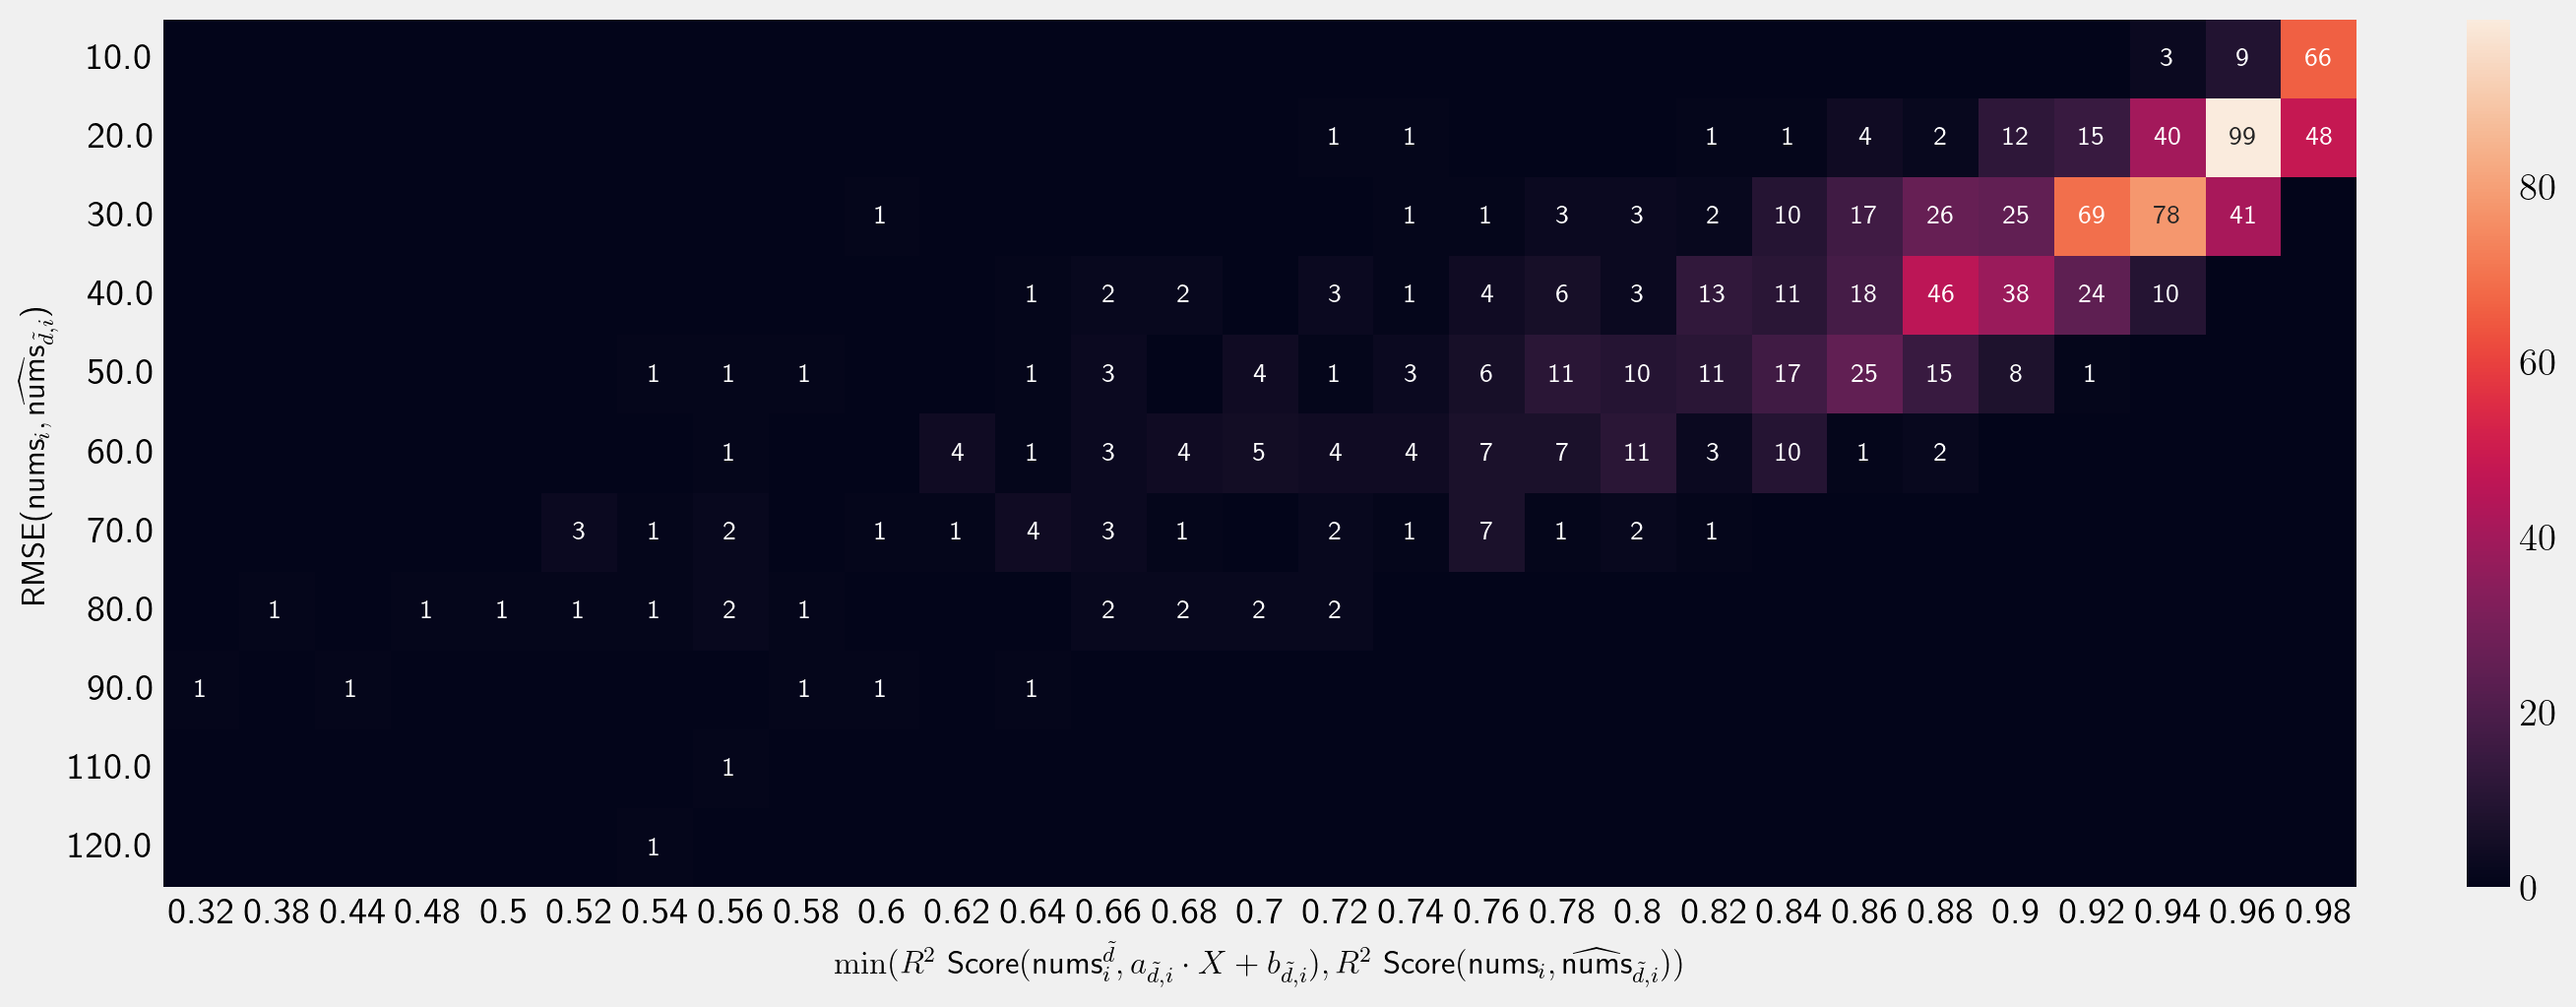

In [ ]:
df_temp = pd.DataFrame(rslts)
df_temp['r2score'] = (df_temp['r2score3']*100 //2)*2/100
df_temp['rmse'] = (df_temp['rmse1']//10)*10+10

data = pd.crosstab(df_temp['r2score'],df_temp['rmse']).T
fig,ax = plt.subplots(figsize=(13,5))
sns.heatmap(data,annot=True,ax=ax,annot_kws={'size':10},fmt='d')

show_annot_array = data > 0
for text, show_annot in zip(ax.texts, show_annot_array.values.flatten()):
    text.set_visible(show_annot)

ax.set_xlabel(r'$\min (R^2$ Score$(\text{nums}_i^{\tilde{d}},a_{\tilde{d},i}\cdot X+b_{\tilde{d},i}),R^2$ Score$(\text{nums}_i,\widehat{\text{nums}}_{\tilde{d},i}))$',fontsize = 12)
ax.set_ylabel(r'RMSE($\text{nums}_i,\widehat{\text{nums}}_{\tilde{d},i}$)',fontsize=12)

In [ ]:
list(filter(lambda x : 'child' in x, ax.__dir__()))

['_children', 'child_axes', 'add_child_axes', 'get_children']

In [ ]:
for a in ax.get_children():
  print(a.__dict__)
  break

{'_coordinates': array([[[ 0,  0],
        [ 1,  0],
        [ 2,  0],
        [ 3,  0],
        [ 4,  0],
        [ 5,  0],
        [ 6,  0],
        [ 7,  0],
        [ 8,  0],
        [ 9,  0],
        [10,  0],
        [11,  0],
        [12,  0],
        [13,  0],
        [14,  0],
        [15,  0],
        [16,  0],
        [17,  0],
        [18,  0],
        [19,  0],
        [20,  0],
        [21,  0],
        [22,  0],
        [23,  0],
        [24,  0],
        [25,  0],
        [26,  0],
        [27,  0],
        [28,  0],
        [29,  0]],

       [[ 0,  1],
        [ 1,  1],
        [ 2,  1],
        [ 3,  1],
        [ 4,  1],
        [ 5,  1],
        [ 6,  1],
        [ 7,  1],
        [ 8,  1],
        [ 9,  1],
        [10,  1],
        [11,  1],
        [12,  1],
        [13,  1],
        [14,  1],
        [15,  1],
        [16,  1],
        [17,  1],
        [18,  1],
        [19,  1],
        [20,  1],
        [21,  1],
        [22,  1],
        [23,  1],
        [

In [ ]:
df_temp['r2score'] = (df_temp['r2score3']*100 //5)*5/100
df_temp['rmse'] = (df_temp['rmse3']//10)*10

pd.crosstab(df_temp['r2score'],df_temp['rmse'])

rmse,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,100.0,110.0
r2score,,,,,,,,,,,
0.30,0,0,0,0,0,0,0,0,1,0,0
0.35,0,0,0,0,0,0,0,1,0,0,0
0.40,0,0,0,0,0,0,0,0,1,0,0
0.45,0,0,0,0,0,0,0,1,0,0,0
0.50,0,0,0,0,1,0,3,2,0,0,1
0.55,0,0,0,0,2,1,3,4,1,1,0
0.60,0,0,1,0,1,4,5,0,1,0,0
0.65,0,0,0,5,3,8,5,4,1,0,0
0.70,0,1,1,3,8,11,2,4,0,0,0


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1766: UserWarning: The figure layout has changed to tight
  f.tight_layout()


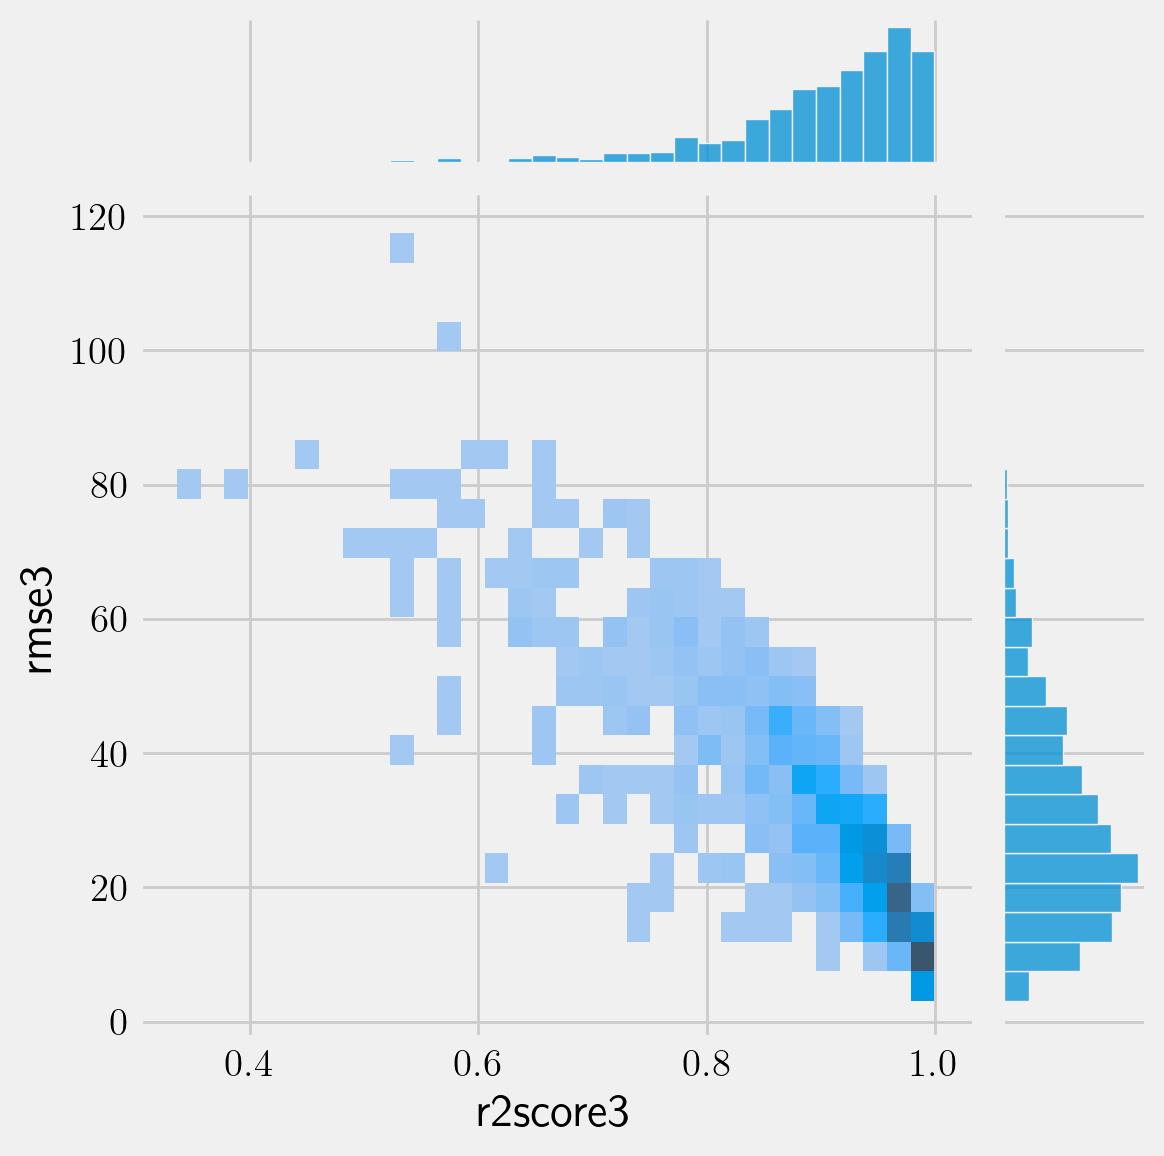

In [ ]:
sns.jointplot(data=df_temp,x='r2score3',y='rmse3',kind='hist')

Text(0.5, 0, 'RMSE$(\\text{nums}_i,\\text{nums}_{\\text{reg},i,d^{*}})$')

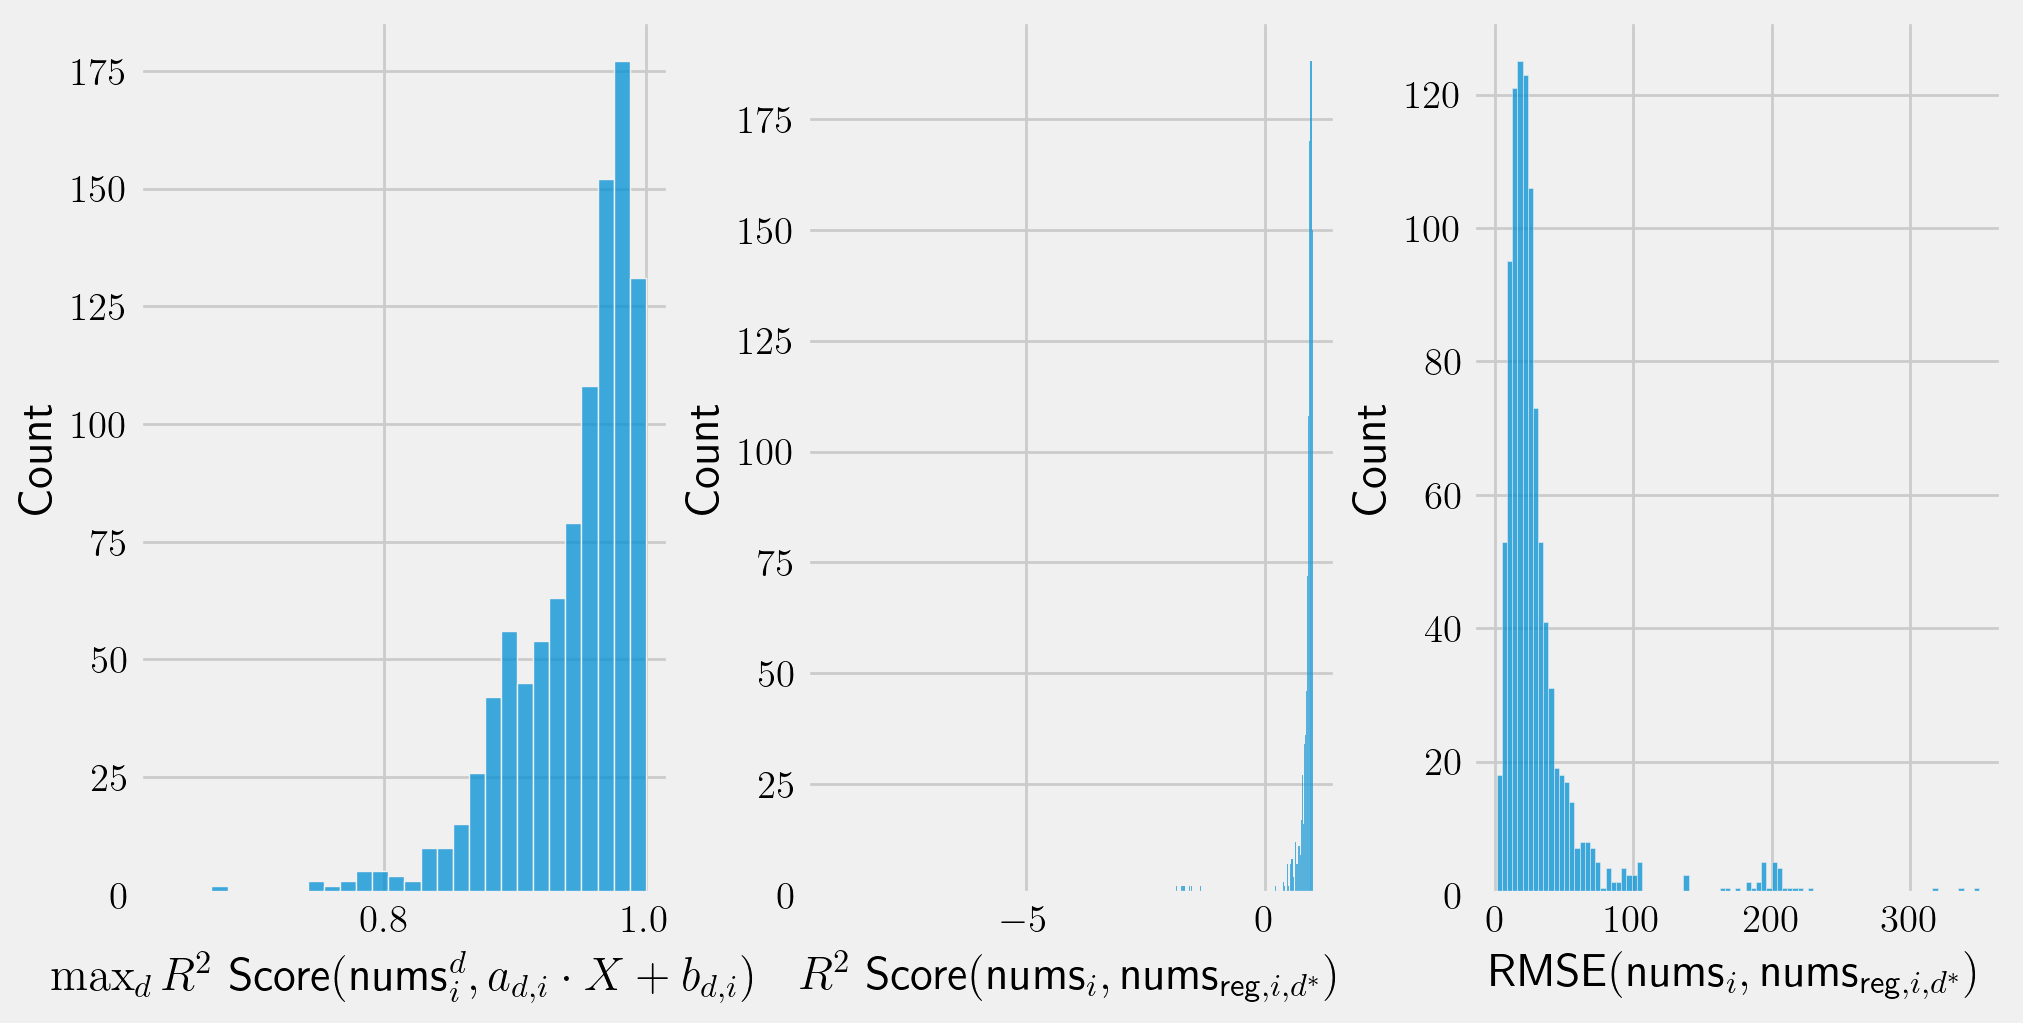

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
#from matplotlib import rcParams
#rcParams['text.usetex'] = True

fig,ax = plt.subplots(1,3, figsize=(10,5))

#sns.histplot(deg_list,ax=ax[0])
#sns.histplot(deg_list,ax=ax[1])
#sns.histplot(deg_list,ax=ax[2])
sns.histplot(rslts['r2score20'],ax=ax[0])
sns.histplot(rslts['r2score21'],ax=ax[1])
sns.histplot(rslts['rmse2'],ax=ax[2])

ax[0].set_xlabel(r'$\max_{d}R^2$ Score$(\text{nums}_i^d,a_{d,i}\cdot X+b_{d,i})$')
ax[1].set_xlabel(r'$R^2$ Score$(\text{nums}_i,\text{nums}_{\text{reg},i,d^{*}})$')
ax[2].set_xlabel(r'RMSE$(\text{nums}_i,\text{nums}_{\text{reg},i,d^{*}})$')

In [ ]:
np.array(rslts['r2score21'])[23]

-1.5601835030233708

In [ ]:
cands = cands_list[23]
reg_rslt=dict()
for deg in deg_list:
  y= np.power(cands, deg)
  reg = LinearRegression(fit_intercept=True)
  reg.fit(X,y)
  a,b = reg.coef_,reg.intercept_
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
  reg_rslt[deg]= {
      'r2score1':r2_score(cands,estim),
      'rmse' : rmse(cands,estim),
      'r2score2':r2_score(y,a*X+b),
  }
df_rslt = pd.DataFrame(reg_rslt).T
#display(df_rslt.T[['r2score1','r2score2']].describe())
display(df_rslt.r2score1.max())
display(df_rslt.rmse.min())
idx = df_rslt.index[df_rslt.r2score2.argmax()]
display(df_rslt.loc[idx,'r2score2'])
display(df_rslt.loc[idx,'r2score1'])
display(df_rslt.loc[idx,'rmse'])

<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-77-2fc8b26c0ce8>:8: RuntimeWarning: invalid value enco

0.9038288147316524

35.712044615785786

0.9456886807277913

-1.5601835030233708

184.25860489938773

In [ ]:
df_rslt.describe()

,r2score1,rmse,r2score2
count,600.000000,600.000000,600.000000
mean,-0.162381,76.965800,0.879207
std,11.854730,97.502493,0.052719
min,-285.114842,35.712045,0.785800
25%,0.446421,39.188794,0.830729
50%,0.796435,51.956965,0.886705
75%,0.884192,85.680484,0.930806
max,0.903829,1947.881014,0.945689


In [ ]:
cands_list[23]

array([165., 183., 243., 411., 420., 435.])

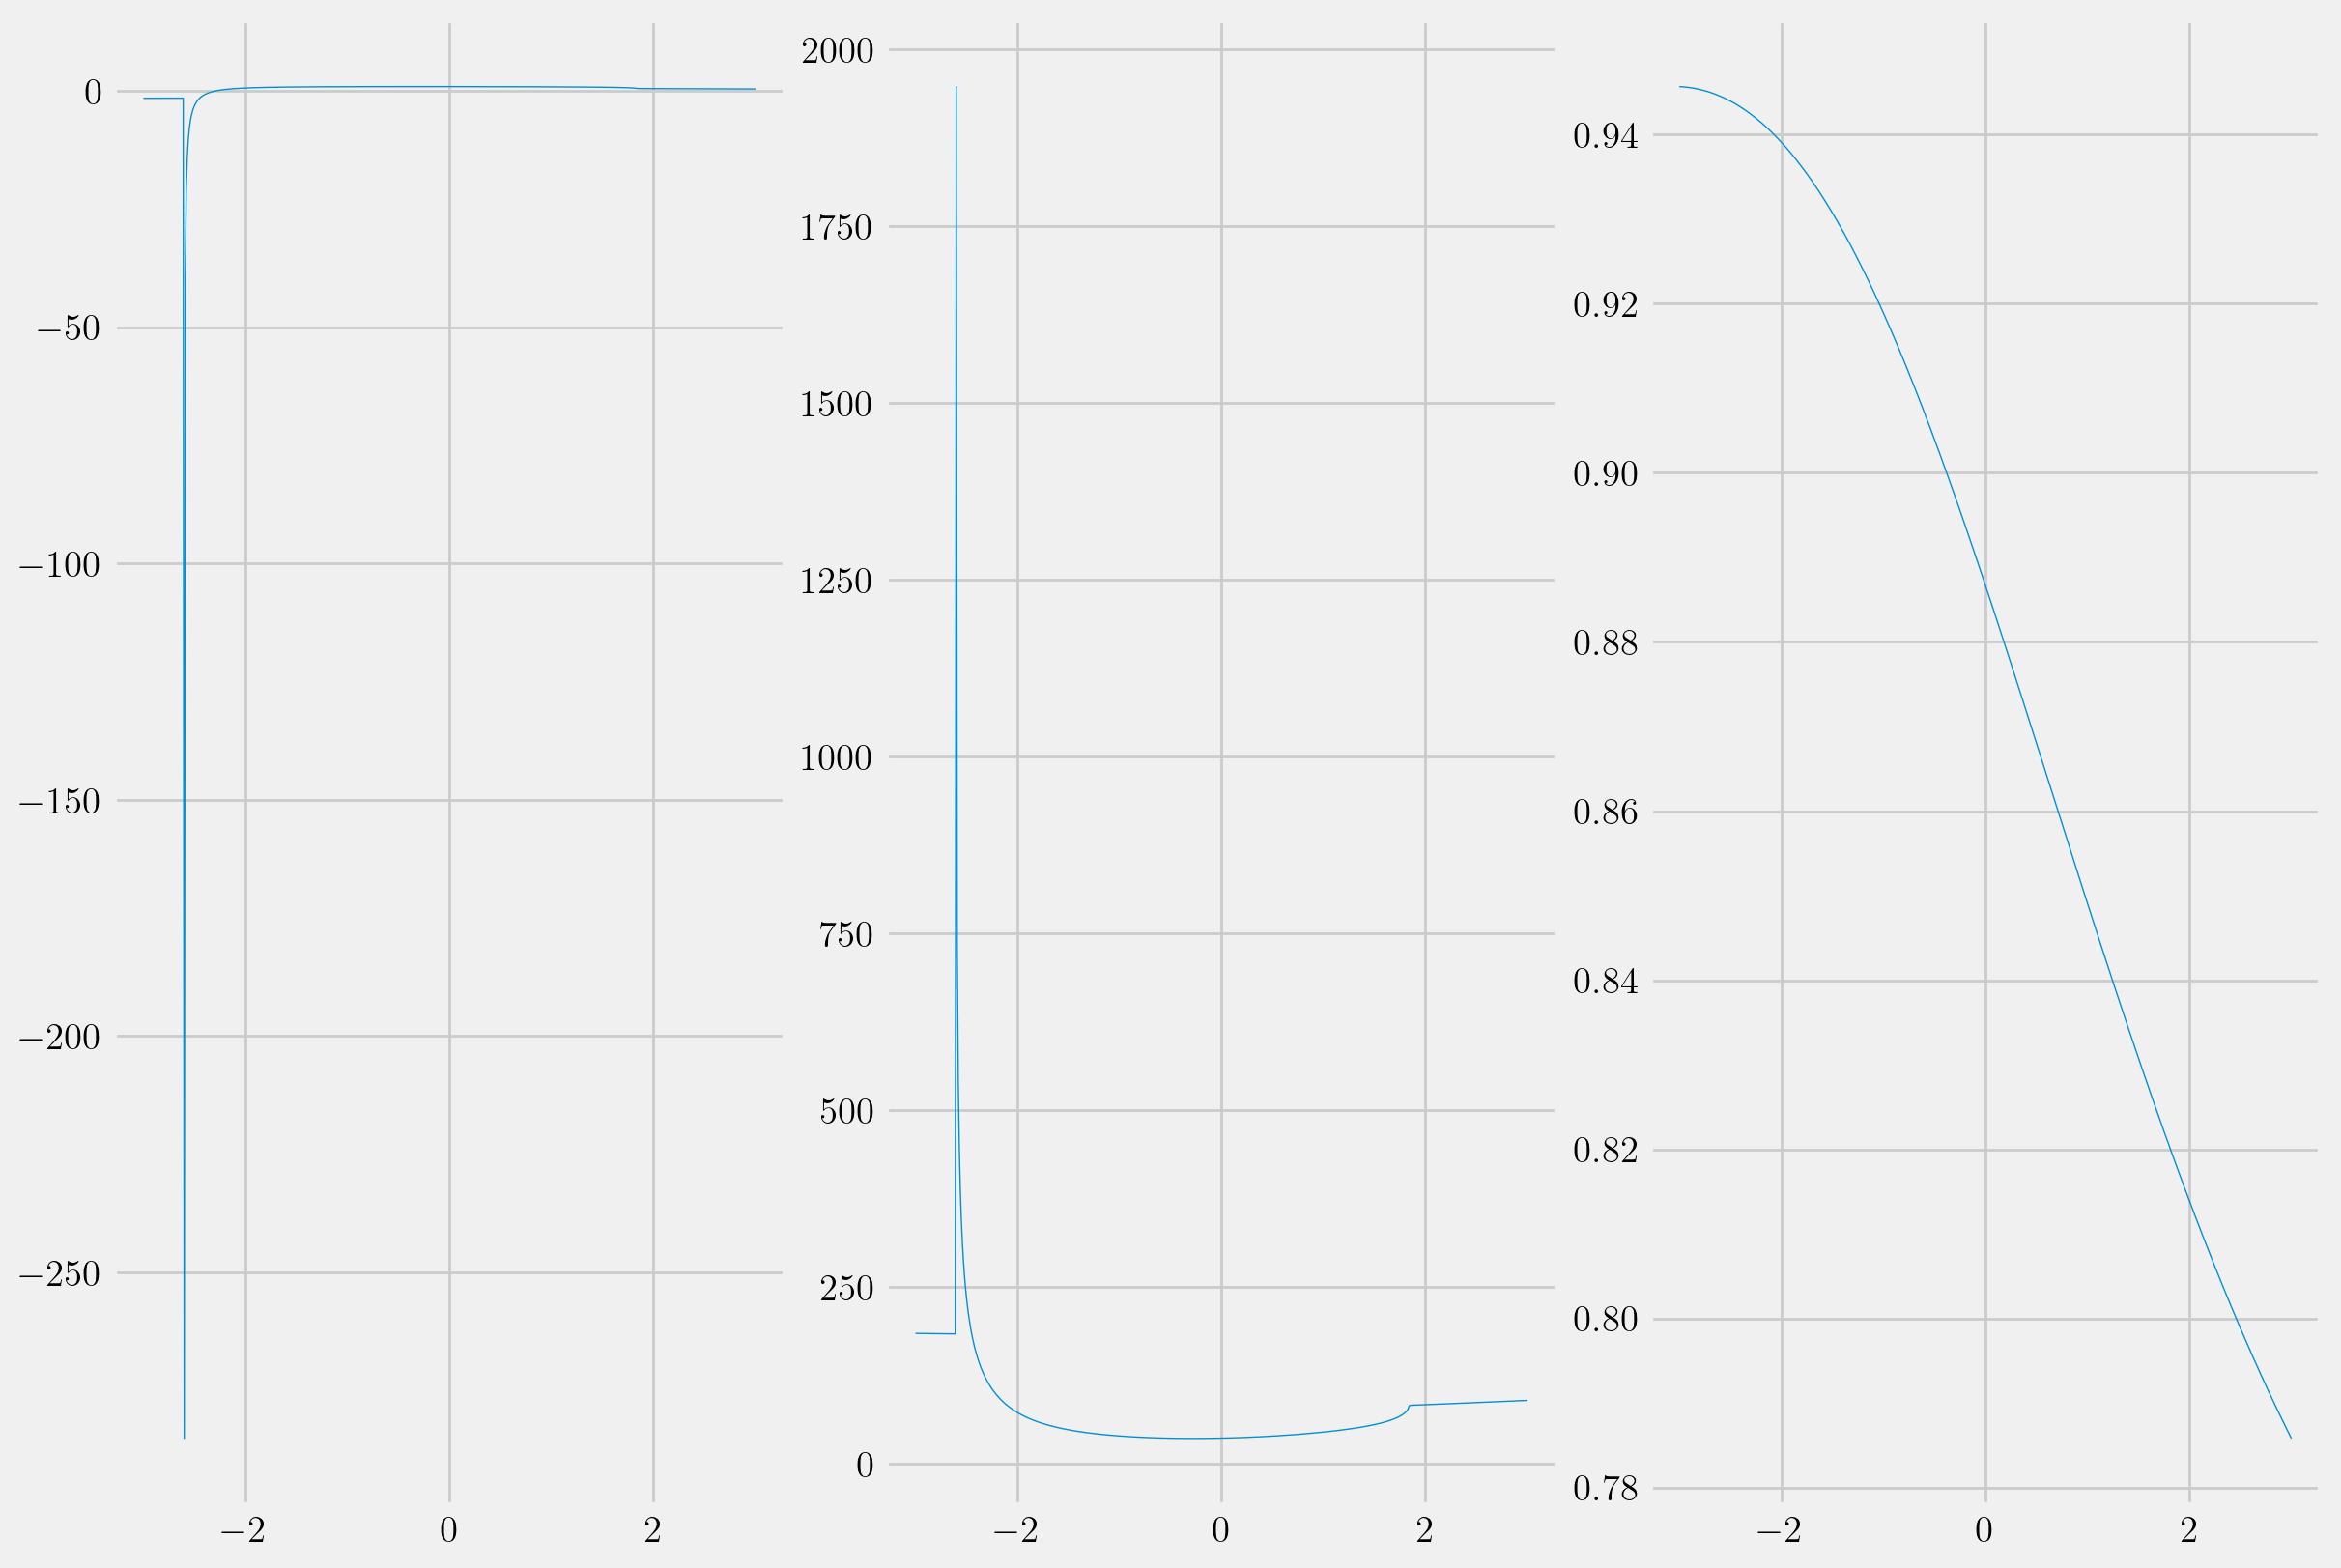

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(12,8))
ax[0].plot(df_rslt.index,df_rslt['r2score1'],lw=0.5)
ax[1].plot(df_rslt.index,df_rslt['rmse'],lw=0.5)
ax[2].plot(df_rslt.index,df_rslt['r2score2'],lw=0.5)

<ipython-input-104-5e52482fc654>:6: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))


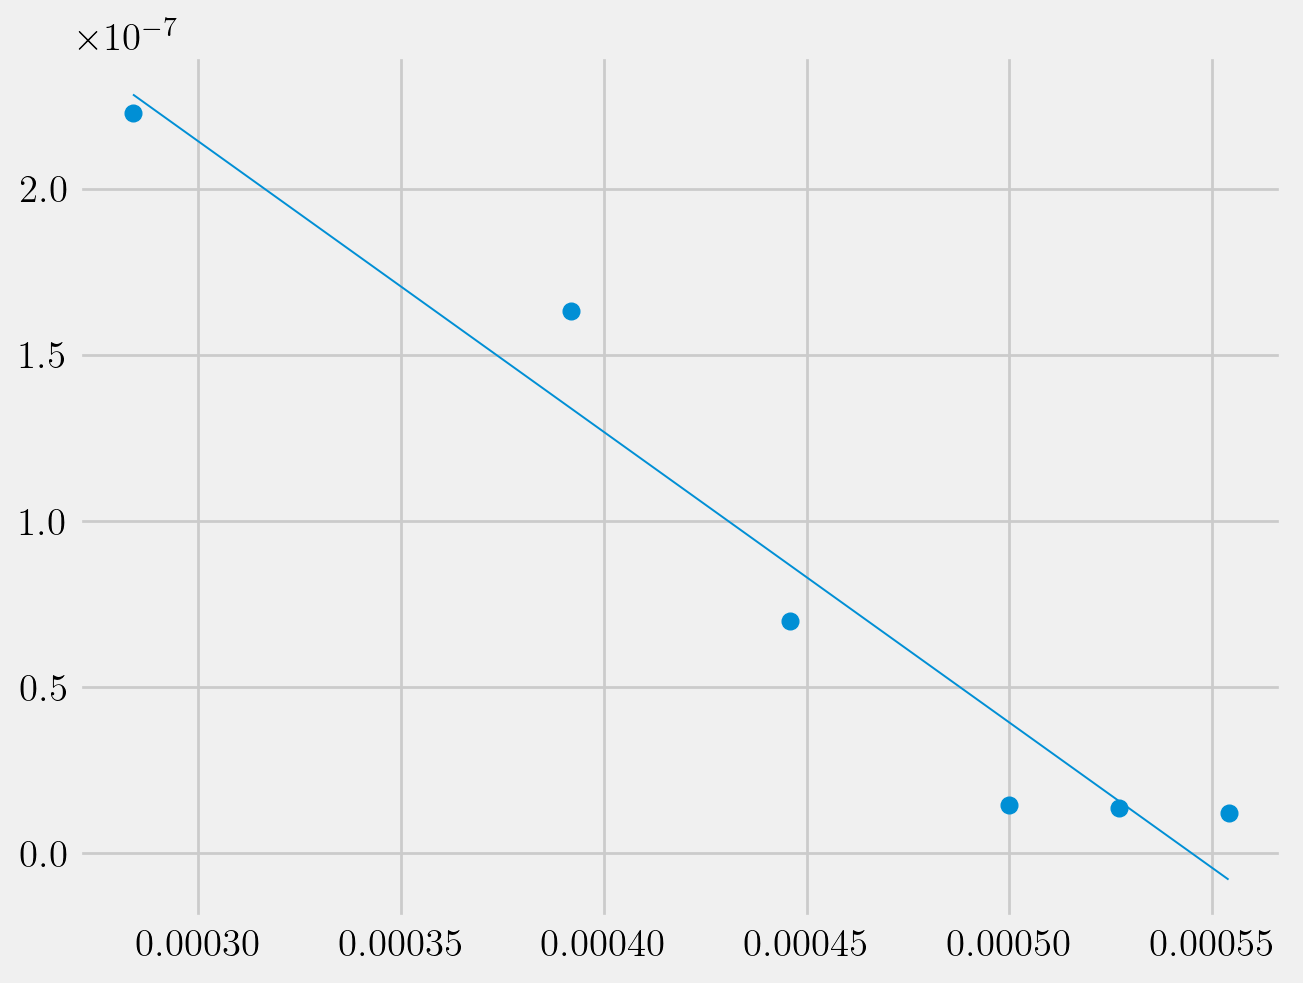

In [ ]:
deg=-3
y= np.power(cands, deg)
reg = LinearRegression(fit_intercept=True)
reg.fit(X,y)
a,b = reg.coef_,reg.intercept_
estim = np.nan_to_num(np.power(a*X+b,1/deg))

fig,ax = plt.subplots()
ax.scatter(X.reshape(-1),np.power(cands,deg))
X_dash = np.linspace(X.min(),X.max(),200)
ax.plot(X_dash, a*X_dash+b,lw=0.7)


In [ ]:
print(np.mean(np.array(rslts['r2score1'])>0.98))
print(np.mean(np.array(rslts['rmse1'])<10))
print(np.mean(np.array(rslts['r2score20'])>0.98))
print(np.mean(np.array(rslts['r2score21'])>0.98))
print(np.mean(np.array(rslts['rmse2'])<10))

0.174
0.13
0.243
0.139
0.107


In [ ]:
print(np.mean(np.array(rslts['r2score1'])>0.97))
print(np.mean(np.array(rslts['rmse1'])<10))
print(np.mean(np.array(rslts['r2score20'])>0.965))
print(np.mean(np.array(rslts['r2score21'])>0.97))
print(np.mean(np.array(rslts['rmse2'])<10))

0.274
0.13
0.44
0.211
0.107


In [ ]:
del rslts[False]

In [ ]:
for key,val in rslts.items():
  print(key,len(val))

r2score1 1000
rmse1 1000
r2score20 1000
r2score21 1000
rmse2 1000


In [ ]:
df = pd.DataFrame(rslts)
print(np.mean((df['r2score1']>0.98) & (df['r2score20']>0.98) & (df['rmse1'] < 10)))
print(np.mean((df['r2score21']>0.98) & (df['r2score20']>0.98) & (df['rmse2'] < 10)))
print(np.mean((df['r2score21']>0.98) & (df['r2score20'] > 0.98)))
print(np.mean((df['r2score20']>0.98) & (df['rmse2'] < 10)))
print(np.mean((df['r2score21']>0.98) & (df['rmse2'] < 10)))

0.1
0.082
0.126
0.088
0.084


In [ ]:
df = pd.DataFrame(rslts)
print(np.mean((df['r2score1']>0.96) & (df['r2score20']>0.96) & (df['rmse1'] < 10)))
print(np.mean((df['r2score21']>0.96) & (df['r2score20']>0.96) & (df['rmse2'] < 10)))
print(np.mean((df['r2score21']>0.96) & (df['r2score20'] > 0.96)))
print(np.mean((df['r2score20']>0.96) & (df['rmse2'] < 10)))
print(np.mean((df['r2score21']>0.96) & (df['rmse2'] < 10)))

0.123
0.099
0.283
0.104
0.1


## generate functions

In [ ]:
min(deg_list),max(deg_list),X

(-3.0,
 2.999999999999872,
 array([[0.000284],
        [0.000392],
        [0.000446],
        [0.0005  ],
        [0.000527],
        [0.000554]]))

In [ ]:
np.sign(-234)

-1

In [ ]:
from collections import defaultdict

X = X.reshape(-1)

genned ={
    'deg' : np.random.choice(deg_list,1000),
    'a':np.zeros(1000),
    'b':np.zeros(1000),
    'y':np.zeros((1000,len(X))),
}

for i,d in enumerate(tqdm(genned['deg'])):
  while True:
    while True :
      ran = sorted((max_val-min_val) * np.random.random_sample(2)+min_val)
      ran = np.round(ran)[::-1]
      if np.abs(ran[1]-ran[0]) >= len(X)-1 : break
    a = (np.power(ran[1],1/d)-np.power(ran[0],1/d))/(X[-1]-X[0])
    b = np.power(ran[0],1/d) - a * X[0]
    cands = np.round(np.power(a*X+b,1/d))
    if len(set(cands))==len(X) : break
  genned['a'][i] = a
  genned['b'][i] = b
  genned['y'][i] = cands


  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
from tqdm.auto import tqdm
from collections import defaultdict

rslt_gen = defaultdict(list)

X = X.reshape(-1,1)
for cands in tqdm(genned['y']):
  reg_rslt=dict()
  for deg in deg_list:
    y= np.power(cands, deg)
    reg = LinearRegression(fit_intercept=True)
    reg.fit(X,y)
    a,b = reg.coef_,reg.intercept_
    estim = np.nan_to_num(np.power(a*X+b,1/deg))
    reg_rslt[deg]= {
        'r2score1':r2_score(cands,estim),
        'rmse' : rmse(cands,estim),
        'r2score2':r2_score(y,a*X+b),
    }
  df_rslt = pd.DataFrame(reg_rslt)
  rslt_gen['r2score1'].append(df_rslt.T.r2score1.max())
  rslt_gen['r2score2'].append(df_rslt.T.r2score2.max())
  rslt_gen['rmse'].append(df_rslt.T.rmse.min())

  0%|          | 0/1000 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-55-3792ae74d883>:14: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-55-3792ae74d883>:14: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-55-3792ae74d883>:14: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-55-3792ae74d883>:14: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-55-3792ae74d883>:14: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-55-3792ae74d883>:14: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-55-3792ae74d883>:14: RuntimeWarning: invalid value encountered in power
  estim = np.nan_to_num(np.power(a*X+b,1/deg))
<ipython-input-55-3792ae74

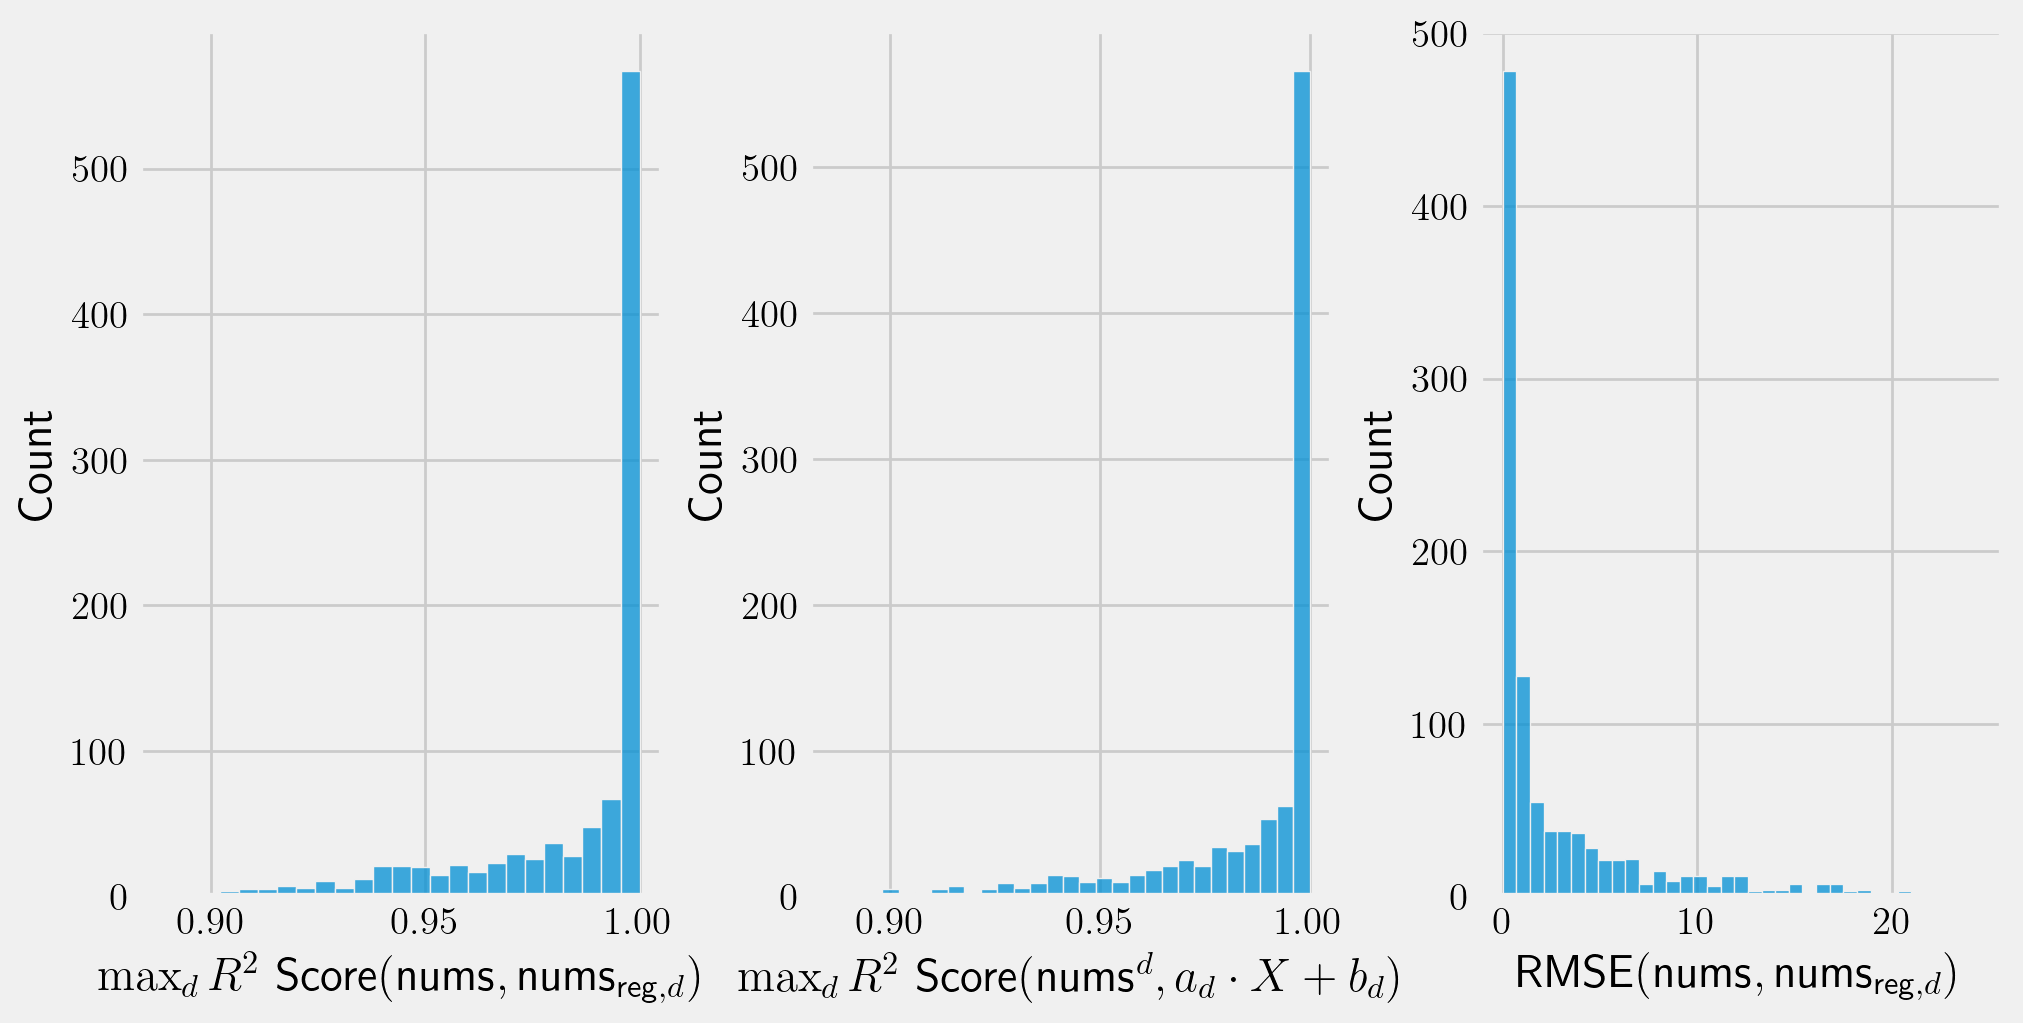

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
#from matplotlib import rcParams
#rcParams['text.usetex'] = True

fig,ax = plt.subplots(1,3, figsize=(10,5))

#sns.histplot(deg_list,ax=ax[0])
#sns.histplot(deg_list,ax=ax[1])
#sns.histplot(deg_list,ax=ax[2])
sns.histplot(rslt_gen['r2score1'],ax=ax[0])
sns.histplot(rslt_gen['r2score2'],ax=ax[1])
sns.histplot(rslt_gen['rmse'],ax=ax[2])

ax[0].set_xlabel(r'$\max_{d}R^2$ Score$(\text{nums},\text{nums}_{\text{reg},d})$')
ax[1].set_xlabel(r'$\max_{d}R^2$ Score$(\text{nums}^d,a_d\cdot X+b_d)$')
ax[2].set_xlabel(r'RMSE$(\text{nums},\text{nums}_{\text{reg},d})$')
pass

In [ ]:
df_gen= pd.DataFrame(rslt_gen)

print(np.mean(df_gen['r2score1']>0.98))
print(np.mean(df_gen['r2score2']>0.98))
print(np.mean(df_gen['rmse']<10))
np.mean((df_gen['r2score1']>0.98) & (df_gen['r2score2']>0.98) & (df_gen['rmse'] < 10))

0.731
0.75
0.912


0.724